# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/Bank_loan_data.xlsx', index_col="ID")

In [3]:
df.head(10)

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1
6,37,M,13,29.0,92121,4,0.4,2,155,Rent,0,0,0,1.0,0
7,53,M,27,72.0,91711,2,1.5,2,0,Rent,0,0,0,1.0,0
8,50,M,24,22.0,93943,1,0.3,3,0,Rent,0,0,0,0.0,1
9,35,M,10,81.0,90089,3,0.6,2,104,Rent,0,0,0,1.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Gender              3404 non-null   object 
 2   Experience          5000 non-null   int64  
 3   Income              4933 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Home Ownership      3811 non-null   object 
 10  Personal Loan       5000 non-null   object 
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              4960 non-null   float64
 14  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 625.0+

## Checking the null values in the dataset

In [5]:
df.isnull().sum()

Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [6]:
df.isnull().mean()*100

Age                    0.00
Gender                31.92
Experience             0.00
Income                 1.34
ZIP Code               0.00
Family                 0.00
CCAvg                  0.00
Education              0.00
Mortgage               0.00
Home Ownership        23.78
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
Online                 0.80
CreditCard             0.00
dtype: float64

In [10]:
df['Education'].value_counts()

1    2097
3    1500
2    1403
Name: Education, dtype: int64

In [11]:
df['Gender'].value_counts()

M    1677
F    1607
O      96
-      21
#       3
Name: Gender, dtype: int64

Here the gender column consist of the noise data as - and # which is then eliminated to be a missing values in the column.

In [12]:
df.loc[df['Gender']=='-','Gender']=np.NaN
df.loc[df['Gender']=='#','Gender']=np.NaN

In [13]:
df['Gender'].value_counts()

M    1677
F    1607
O      96
Name: Gender, dtype: int64

In [14]:
df.isnull().sum()

Age                      0
Gender                1620
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [15]:
df['Home Ownership'].value_counts()

Home Mortage    1705
Home Owner      1156
Rent             950
Name: Home Ownership, dtype: int64

Checking outliers in the dataset
Outlier is the abnormal data present in the dataset.

Age                      Axes(0.125,0.53;0.0945122x0.35)
Experience            Axes(0.238415,0.53;0.0945122x0.35)
Income                Axes(0.351829,0.53;0.0945122x0.35)
ZIP Code              Axes(0.465244,0.53;0.0945122x0.35)
Family                Axes(0.578659,0.53;0.0945122x0.35)
CCAvg                 Axes(0.692073,0.53;0.0945122x0.35)
Education             Axes(0.805488,0.53;0.0945122x0.35)
Mortgage                 Axes(0.125,0.11;0.0945122x0.35)
Securities Account    Axes(0.238415,0.11;0.0945122x0.35)
CD Account            Axes(0.351829,0.11;0.0945122x0.35)
Online                Axes(0.465244,0.11;0.0945122x0.35)
CreditCard            Axes(0.578659,0.11;0.0945122x0.35)
dtype: object

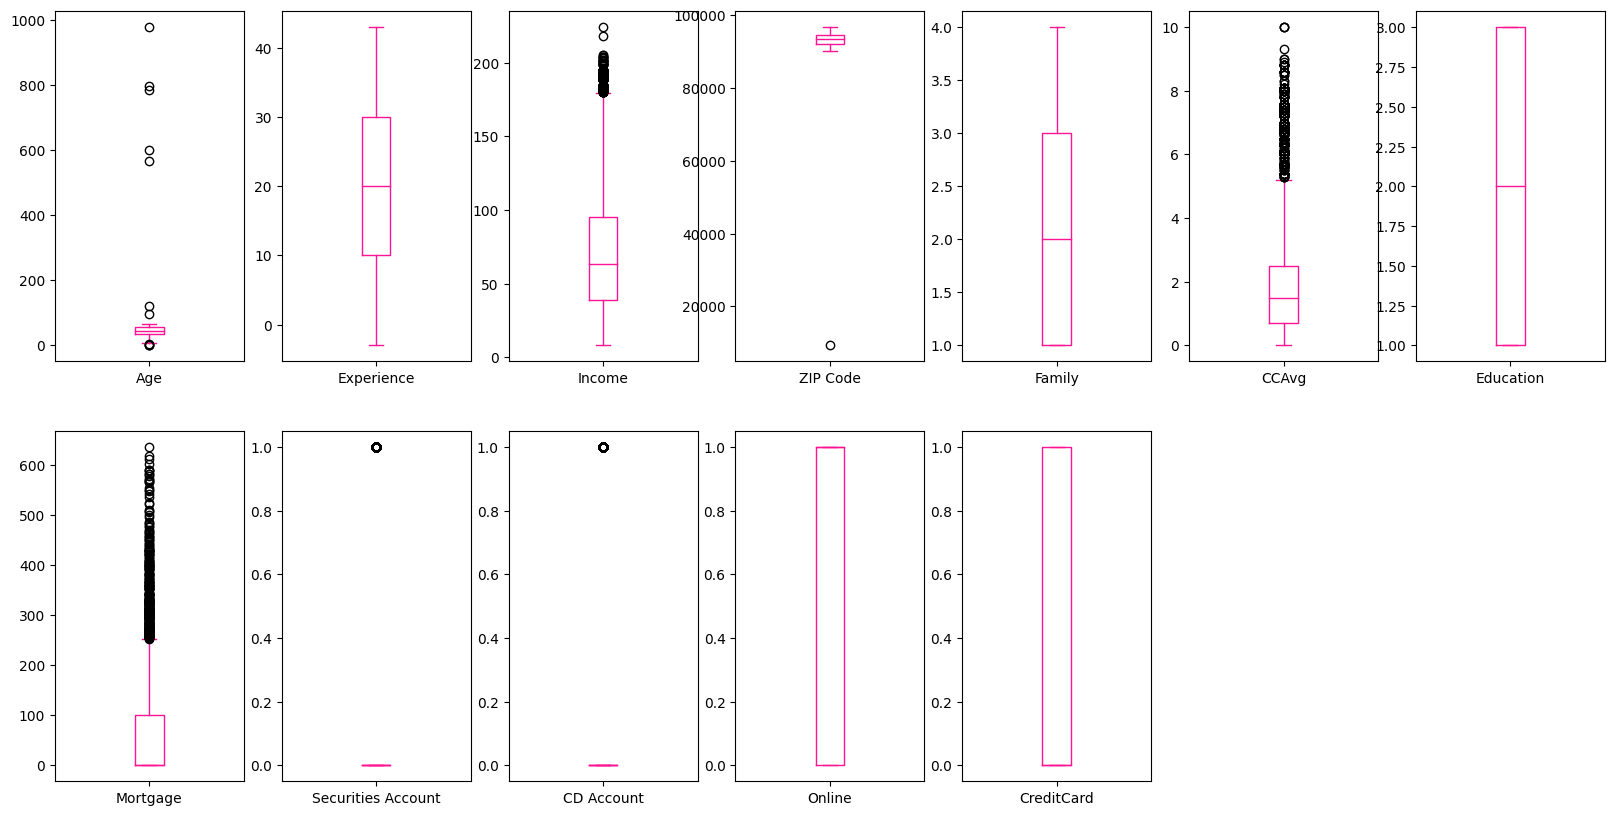

In [16]:
df.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink')

Outlier is the data point that lies in the abnormal distance from other points in the dataset showing different behavior than the normal ones. From the above generated box plot it can be observed that there are few columns with the outliers. In the box plot the outliers can be detected with the method of IQR which where the outliers lies outside of the whisker of the box plot.

Observing the box plot for this bank loan dataset, the outliers can be seen at Age, Income, ZIP Code, CCAvg, Mortgage.

## Individual analysis of the outliers

-45.0
179.0
Number of outliers: 158


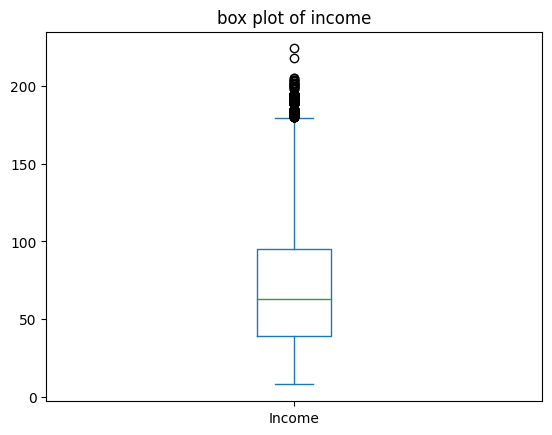

In [17]:
df['Income'].plot(kind='box', title='box plot of income')
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers_count = len(outliers)
print("Number of outliers:", outliers_count)

The income of the customer in the dataset is given as $000. From the above mentioned box plot, it can be observed that the outliers are present in the data above the upper limit of the box whisker plot which is at 179.
Here it is calculated that the number of outliers present in the Income column is 158.

5.0
85.0
Number of outliers: 11


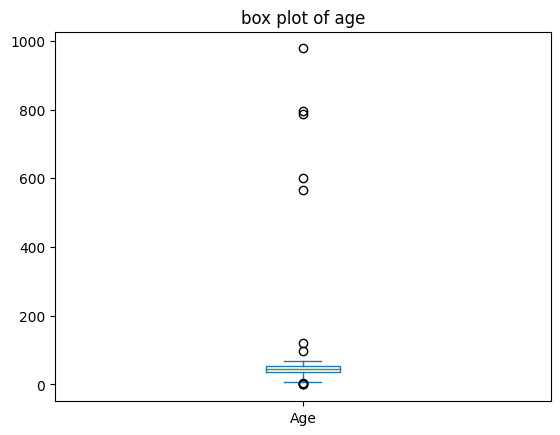

In [18]:
df['Age'].plot(kind='box', title='box plot of age')
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers_count = len(outliers)
print("Number of outliers:", outliers_count)

Here the box plot shows the outlier present in the Age column of the customer in the bank loan dataset. The outliers are present and both the end which mean upper limit as well as lower limit of the plot. Here we can see that the upper limit has the value 85 and the lower limit has the value 5.
The total number of outliers present in the Age column is 11.

-2.0
5.2
Number of outliers: 324


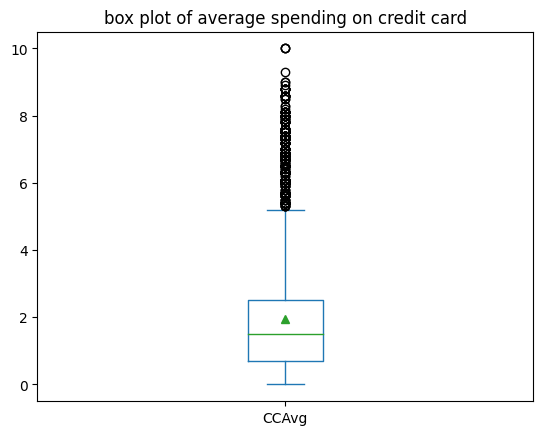

In [19]:
df['CCAvg'].plot(kind='box', showmeans=True, title='box plot of average spending on credit card')
q1 = df['CCAvg'].quantile(0.25)
q3 = df['CCAvg'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)
outliers = df[(df['CCAvg'] < lower_bound) | (df['CCAvg'] > upper_bound)]
outliers_count = len(outliers)
print("Number of outliers:", outliers_count)

The presented box plot shows the outliers in the CCAvg column that represents the average spending on the credit card per month. The outliers are observed to be present beyond the upper limit which is to be 5.2.
Here the calculated number of outliers present are 324.

-151.5
252.5
Number of outliers: 291


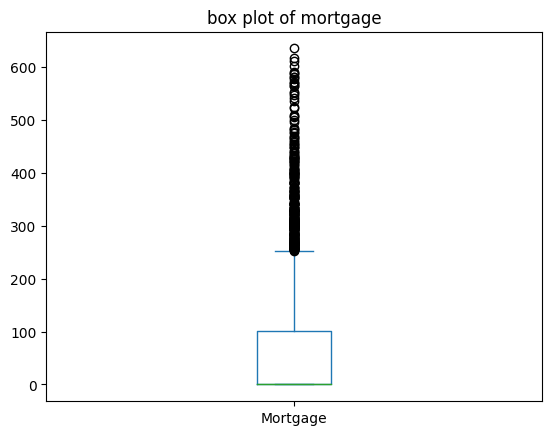

In [20]:
df['Mortgage'].plot(kind='box', title='box plot of mortgage')
q1 = df['Mortgage'].quantile(0.25)
q3 = df['Mortgage'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)
outliers = df[(df['Mortgage'] < lower_bound) | (df['Mortgage'] > upper_bound)]
outliers_count = len(outliers)
print("Number of outliers:", outliers_count)

This boxplot shows the outliers present in the Mortgage column of the dataset for the customer. The outliers in this column are present beyond the upper limit of the box whisker plot which is 252.5
The calculated number of outliers present in the Mortgage column are 291.

87865.5
98653.5
Number of outliers: 1


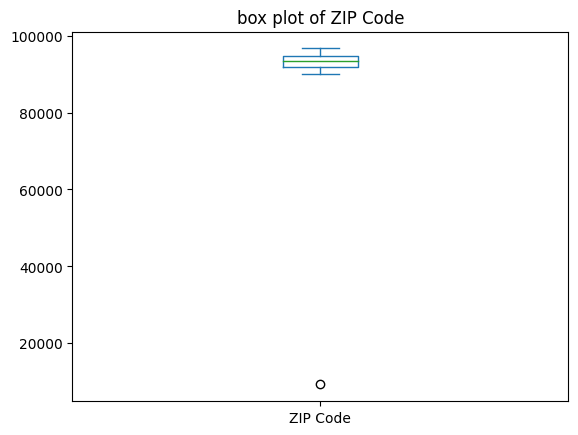

In [21]:
df['ZIP Code'].plot(kind='box', title='box plot of ZIP Code')
q1 = df['ZIP Code'].quantile(0.25)
q3 = df['ZIP Code'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)
outliers = df[(df['ZIP Code'] < lower_bound) | (df['ZIP Code'] > upper_bound)]
outliers_count = len(outliers)
print("Number of outliers:", outliers_count)

This box plot shows the outliers present in the ZIP Code column of the bank loan dataset representing the residence of the customers. Here only one data point is identified as the outliers which is much below the value of lower limit.

# Visualization





## Distplot for Experience

Text(0.5, 1.0, 'Loan experience')

<Figure size 600x400 with 0 Axes>

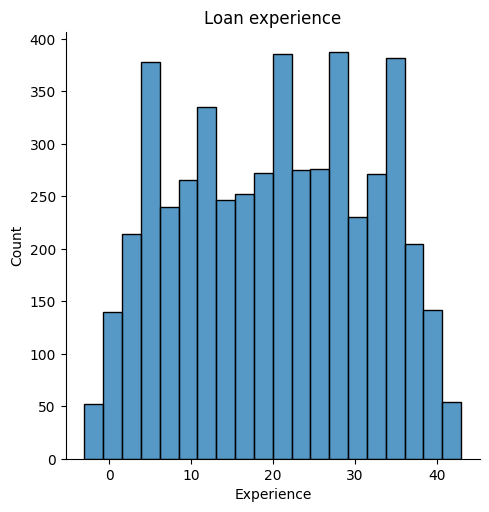

In [22]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Experience'])
plt.xlabel('Experience')
plt.title('Loan experience')

Experience represents the number of professional year of experience. Distplot shows the range of the experience with their count, the maximum here has the range of above 27-30

## Countplot for Creditcard

[Text(0, 0, '3530'), Text(0, 0, '1470')]

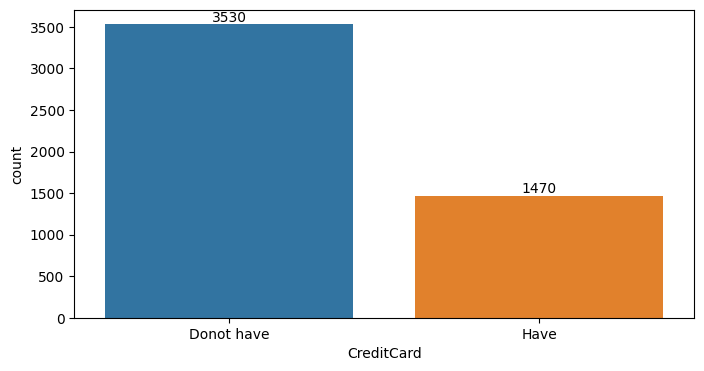

In [23]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="CreditCard")
values = df['CreditCard'].value_counts().values
plt.xticks([0, 1], ['Donot have', 'Have'])
ax.bar_label(container=ax.containers[0], labels=values)

Credit card column represents if the customer use the credit card issued by the universal bank. According to the visualization, it is observed that maximum number of customer does not use the credit card.



[Text(0, 0, '1677'), Text(0, 0, '1607'), Text(0, 0, '96')]

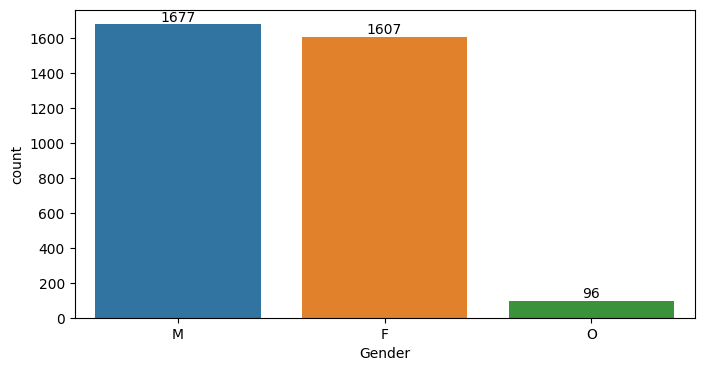

In [24]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Gender")
values = df['Gender'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

From the mentioned bar graph it is observed that the number of maximum customers are male.

## Countplot for Internet banking usage

Online column represents if the customer uses the internet banking facilities

[Text(0, 0, '2961'), Text(0, 0, '1999')]

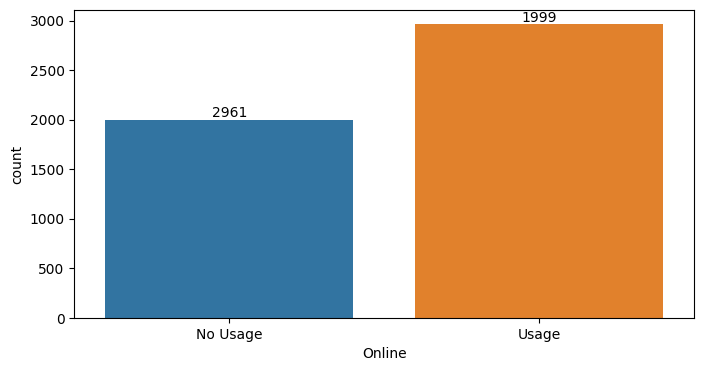

In [25]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Online")
values = df['Online'].value_counts().values
plt.xticks([0, 1], ['No Usage', 'Usage'])
ax.bar_label(container=ax.containers[0], labels=values)

From the given countplot, we can observe that the number of customer using the internet banking facilities is maximum than those who don't use.

## Distplot for Income

Text(0.5, 1.0, 'Income earned')

<Figure size 600x400 with 0 Axes>

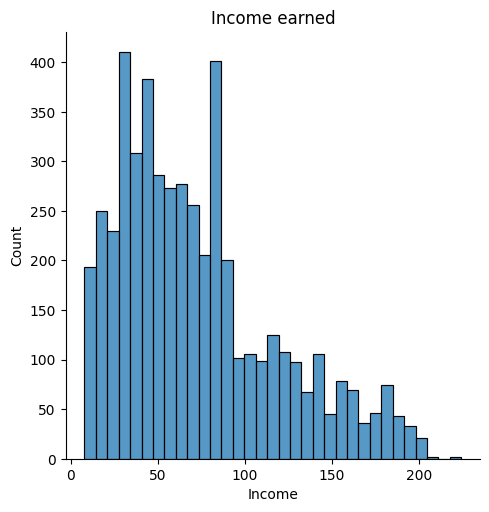

In [26]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Income'])
plt.xlabel('Income')
plt.title('Income earned')

Here it is observed that the maximum customer has the income ranging from 45-50k in dollars

## Distplot for CCAvg

Text(0.5, 1.0, 'Average spending on credit card per month')

<Figure size 600x400 with 0 Axes>

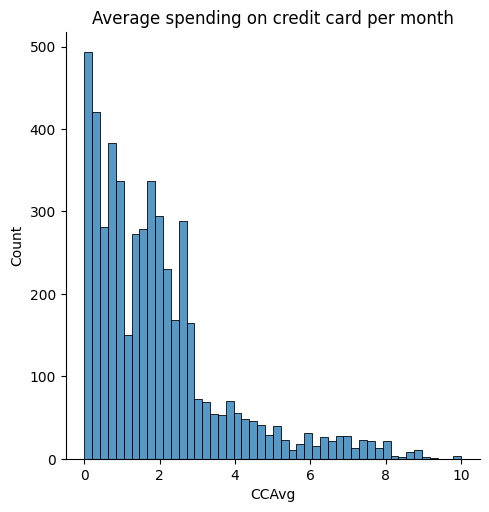

In [27]:
plt.figure(figsize=(6,4))
sns.displot(x=df['CCAvg'])
plt.xlabel('CCAvg')
plt.title('Average spending on credit card per month')

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

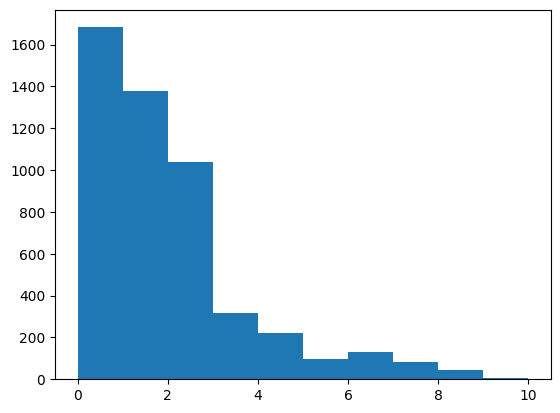

In [28]:
plt.hist(df['CCAvg'])

For Average spending on credit card by the customer per month the maximum customer does not have spending on the credit card.

## Countplot for family size

[Text(0, 0, '1472'),
 Text(0, 0, '1296'),
 Text(0, 0, '1222'),
 Text(0, 0, '1010')]

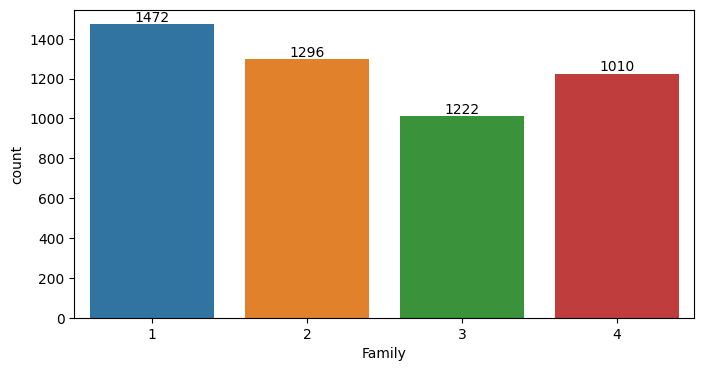

In [29]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Family")
values = df['Family'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

The countplot shows the number of customer with their family size. The maximum customer has the size 1 being the value 1472 and the minimum count of the family size is 1010.

## Countplot for the customer with their education background

[Text(0, 0, '2097'), Text(0, 0, '1500'), Text(0, 0, '1403')]

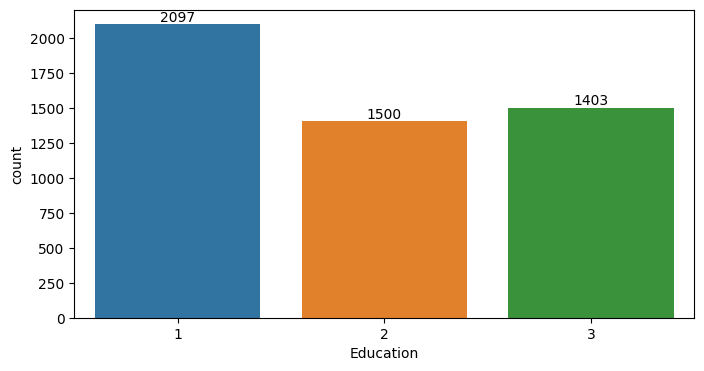

In [30]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Education")
values = df['Education'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
With this level it can be observed that the count of customer having the education background of Undergraduate has the maximum count and Advanced/Professional has the minimum count.

Text(0.5, 9.444444444444438, 'Mortgage')

<Figure size 600x400 with 0 Axes>

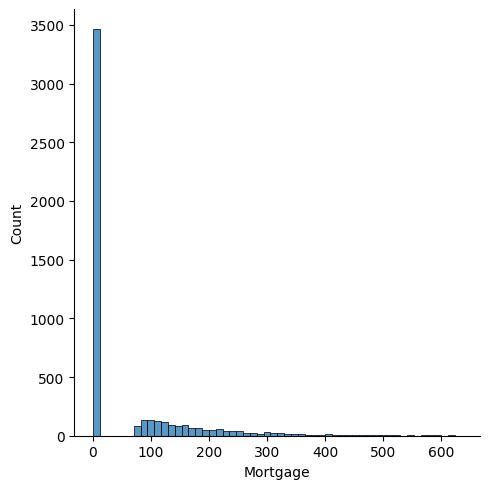

In [31]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Mortgage'])
plt.xlabel('Mortgage')
# plt.title('Average spending on credit card per month')

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <BarContainer object of 10 artists>)

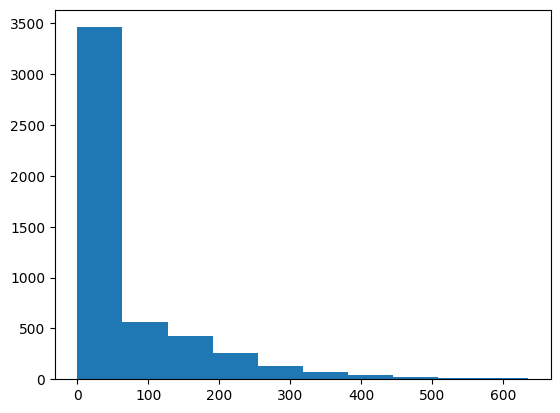

In [32]:
plt.hist(df['Mortgage'])

Observing this both of the plot maximum number of the customer do not have any mortgage value.

## Countplot for Securities Account

This column represents if the customer has the securities account with the bank

[Text(0, 0, '4478'), Text(0, 0, '522')]

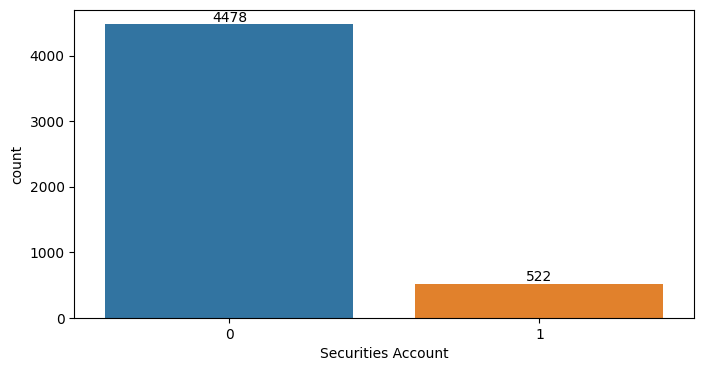

In [33]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Securities Account")
values = df['Securities Account'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Here in the countplot it is observed that the maximum number of the customer don't have the securities account

## Countplot for CD Account

This column represent the Certificate of deposit with the bank

[Text(0, 0, '4698'), Text(0, 0, '302')]

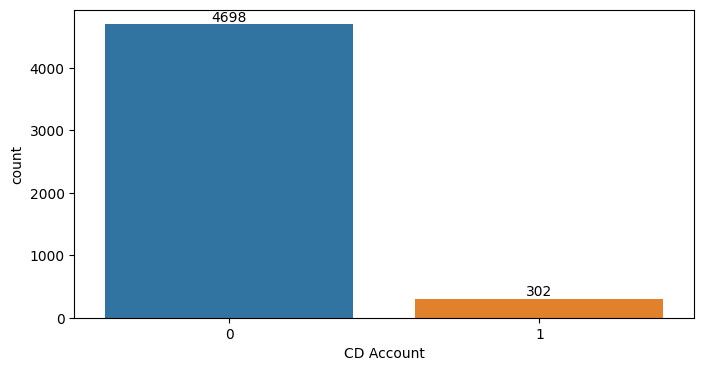

In [34]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="CD Account")
values = df['CD Account'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Here we can see that maximum number of the customer does not have the certificate of Deposit with the bank

## Countplot for Home Ownership


[Text(0, 0, '1705'), Text(0, 0, '1156'), Text(0, 0, '950')]

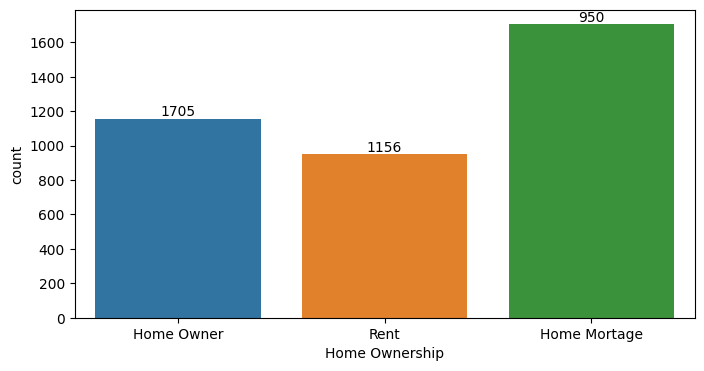

In [35]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Home Ownership")
values = df['Home Ownership'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Here we can see that maximum number of the customer has the home mortgage.

## Multivariate Analysis

## Did the customer accept the personal loan with respect to the education of respective customer?

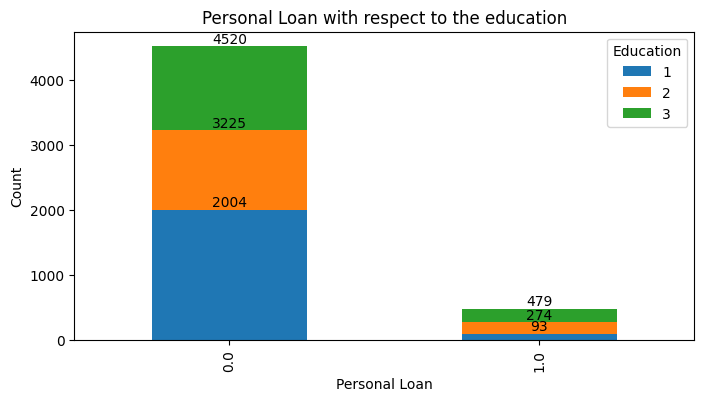

In [36]:
fig, ax=plt.subplots(figsize=(8,4))
df['Personal Loan'] = pd.to_numeric(df['Personal Loan'], errors='coerce')
grouped_data = df.groupby(['Personal Loan', 'Education']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Personal Loan')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to the education')
ax.legend(title='Education')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)



Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Here we can see that the maximum number of customer did not accept the personal loan for all 3 level of education mentioned in the dataset.

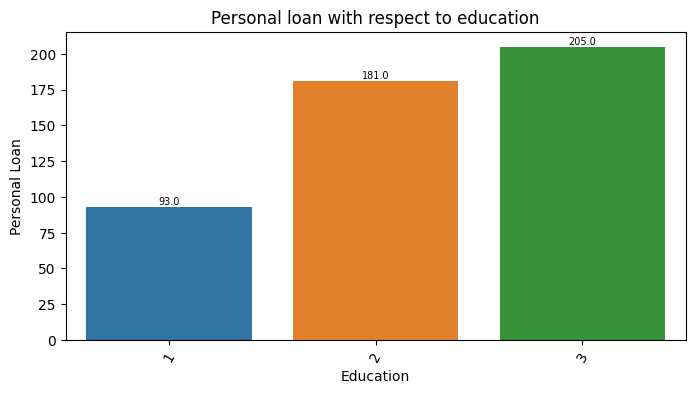

In [37]:
plt.figure(figsize=(8,4))
df['Personal Loan'] = pd.to_numeric(df['Personal Loan'], errors='coerce')
avg_age = df.groupby('Education')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Education', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Personal loan with respect to education')
plt.show()

For the customer who accepted the personal loan offered in the last campaign, maximum customer who accepted the personal loan is of level 3 i.e. Advanced/Professional and minimum customer who accepted the personal loan is level 1 i.e. Undergrad

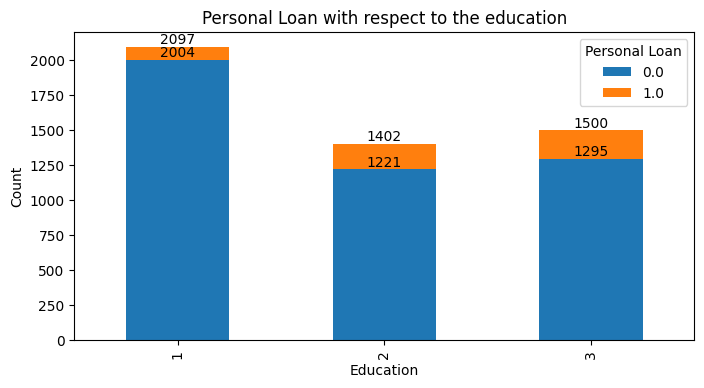

In [38]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Education', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to the education')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

This bar graph shows  that maximum of customer who did not accept the offer is from undergrad level of education.

## The count of customer who uses credit card isued by the Universal Bank if the customer accept the personal loan offered in the last campaign or otherwise.

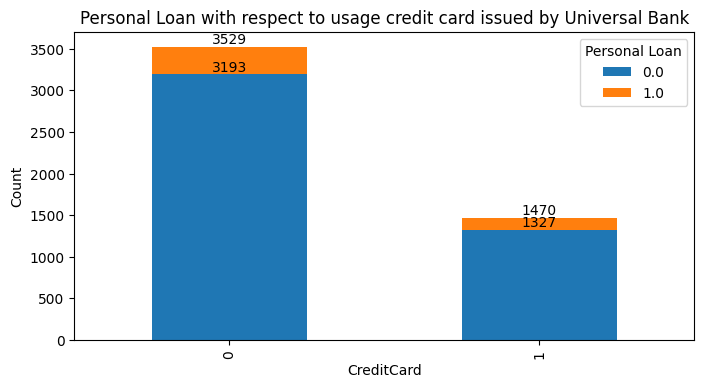

In [39]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['CreditCard', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('CreditCard')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to usage credit card issued by Universal Bank')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here it can be observed that the customer who doesnot accept the personal loan offer has the maximum count for not using the credit card. However, those customer who has maximum count of not accepting the personal loan has the maximum count of not using the credit card.

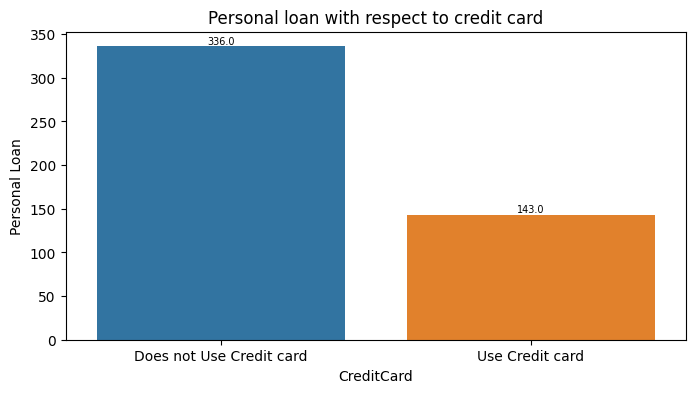

In [40]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('CreditCard')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='CreditCard', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks([0,1], ['Does not Use Credit card', 'Use Credit card'])
plt.title('Personal loan with respect to credit card')
plt.show()

This bar graph shows the count for those who accepted the personal loan. Here 336 number of customer accepted the personal loan and does not use credit card issued by the Universal bank. Whereas 143 number of customer who accepted the personal loan use the credit card issued by the universal bank.

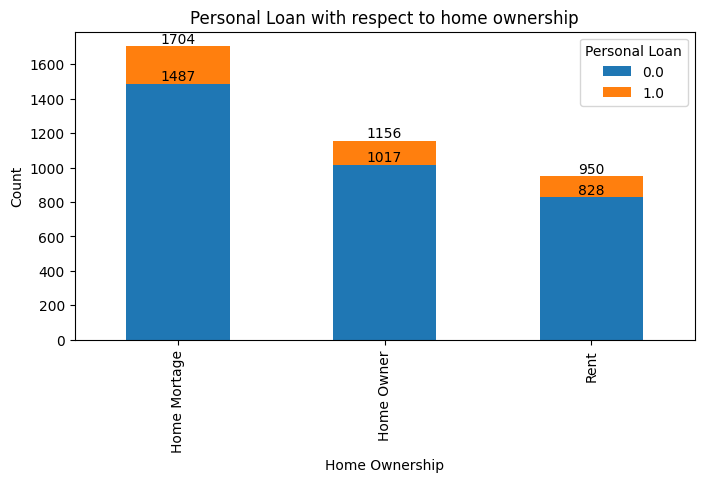

In [41]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Home Ownership', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to home ownership')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here, we can see that there are maximum customer in all three category of home ownership who did not accept the personal loan than that of those who accepted.

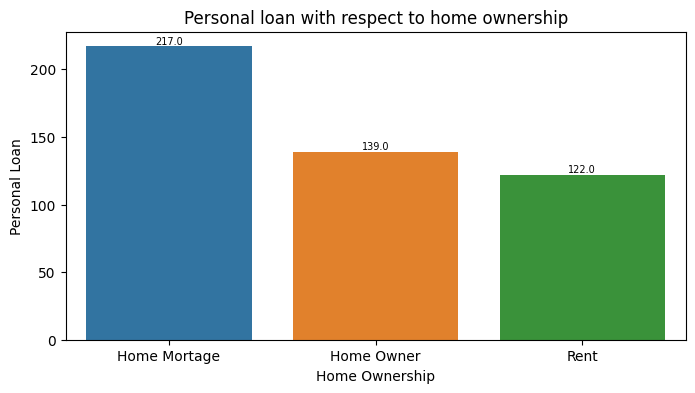

In [42]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('Home Ownership')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Home Ownership', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
# plt.xticks([0,1], ['Does not Use Credit card', 'Use Credit card'])
plt.title('Personal loan with respect to home ownership')
plt.show()

from the given graph the maximum customer who accepted the personal loan has the home mortgage.

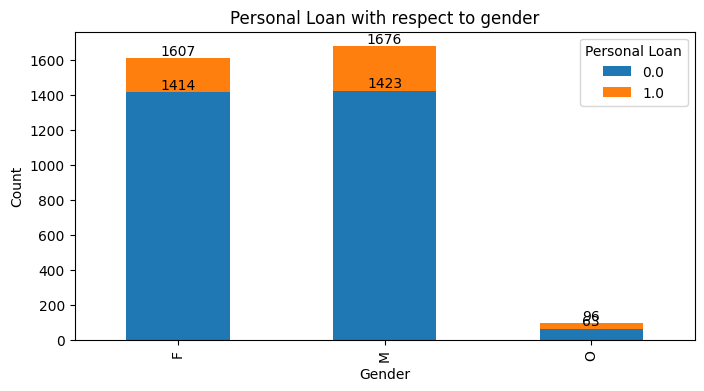

In [43]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Gender', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to gender')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here there are maximum customer who did not accept the personal loan offer for all three category of gender than that of the ones who accepted the personal loan.

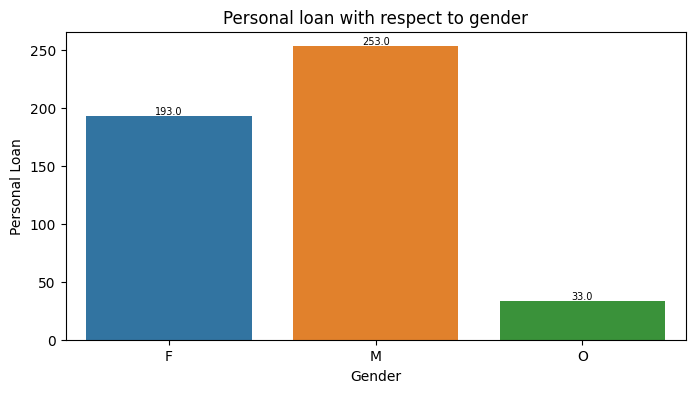

In [44]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('Gender')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Gender', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.title('Personal loan with respect to gender')
plt.show()

Observing the given graph, the male customer are maximum who accepted the personal loan.

## Number of customer who have Certificate of Deposit with the bank if the customer accept the personal loan offered in the last campaign or otherwise.

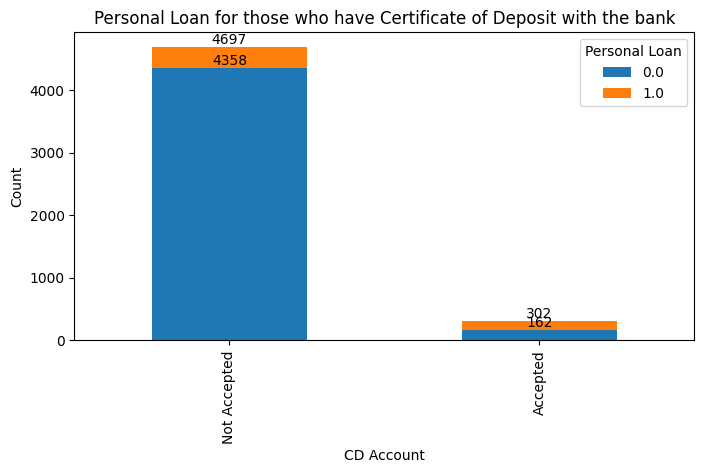

In [45]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['CD Account', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('CD Account')
ax.set_ylabel('Count')
ax.set_title('Personal Loan for those who have Certificate of Deposit with the bank')
ax.legend(title='Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here it can be observed that the maximum customer does not have the certificate of deposit and is not accepting the personal loan offered in the last campaign.

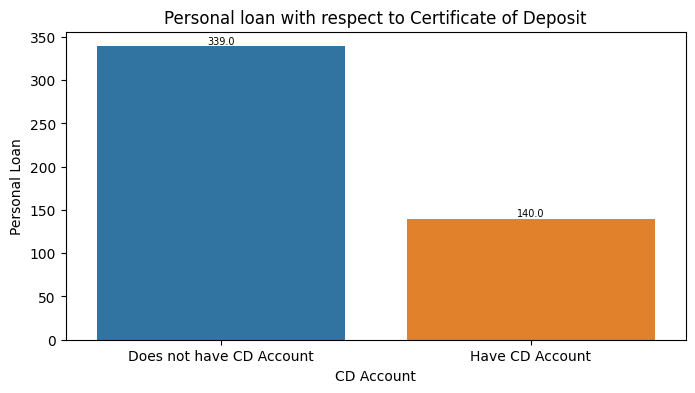

In [46]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('CD Account')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='CD Account', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks([0,1], ['Does not have CD Account', 'Have CD Account'])
plt.title('Personal loan with respect to Certificate of Deposit')
plt.show()

Here we can get the count of those who possess the Certificate of Deposit for those who have accepted the personal loan. From the given bar graph it is calculated that the total number of the customer who does not have the CD Account is 339 and those who have the CD account is 140.

## Number of customer who use Internet banking services and those who accept the personal loan or otherwise

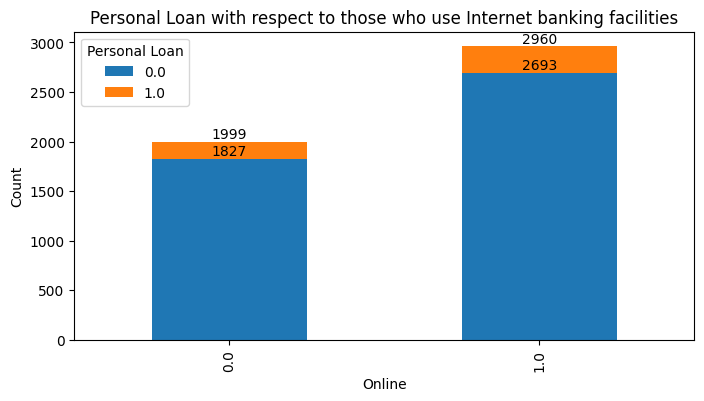

In [47]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Online', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Online')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to those who use Internet banking facilities')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here we can observe that the number of customer who doesnot accept the personal loan for those who use internet banking facilities is higher than that of the ones who does not use the internet services

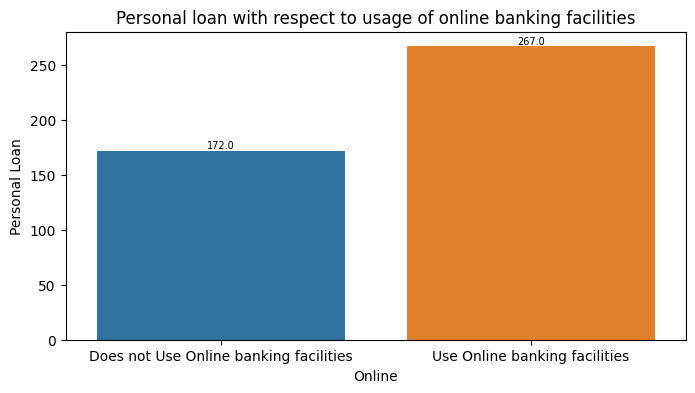

In [48]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('Online')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Online', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks([0,1], ['Does not Use Online banking facilities', 'Use Online banking facilities'])
plt.title('Personal loan with respect to usage of online banking facilities')
plt.show()

This bar graph shows the number of customer who having accepted the offer with respect to those who use the online banking facilities.
Observing the bar graph we can get to the insights that the count of the customer who uses the online banking services is more being 267 for those who have accepted the personal loan and the count for those who does not use is 172

## Customer accepting the personal loan with respect to the security account and otherwise

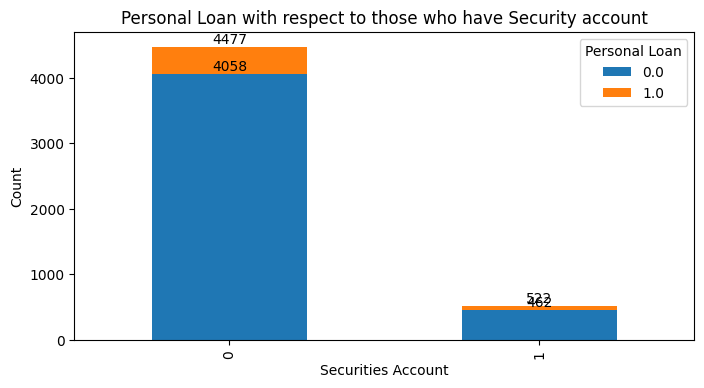

In [49]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Securities Account', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Securities Account')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to those who have Security account')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here we can see that there are maximum customer who does not accept the personal loan for customer having both security account and who does not have security account.

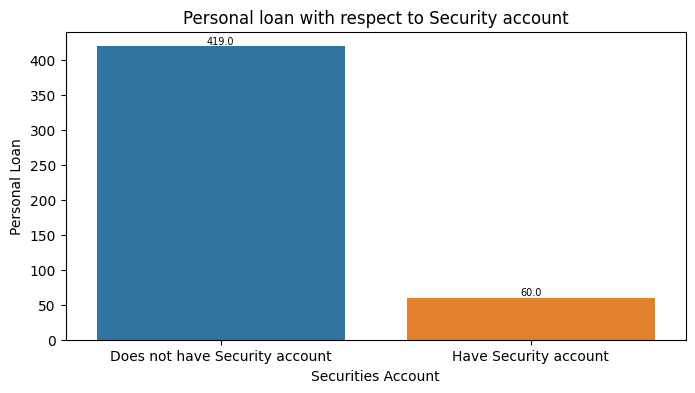

In [50]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('Securities Account')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Securities Account', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks([0,1], ['Does not have Security account', 'Have Security account'])
plt.title('Personal loan with respect to Security account')
plt.show()

Here observing the number of customer accepting the personal loan, maximum customer does not have the security account being 419 and the customer having the security account is 60.

## Customer accepting personal loans with respect to the family size.

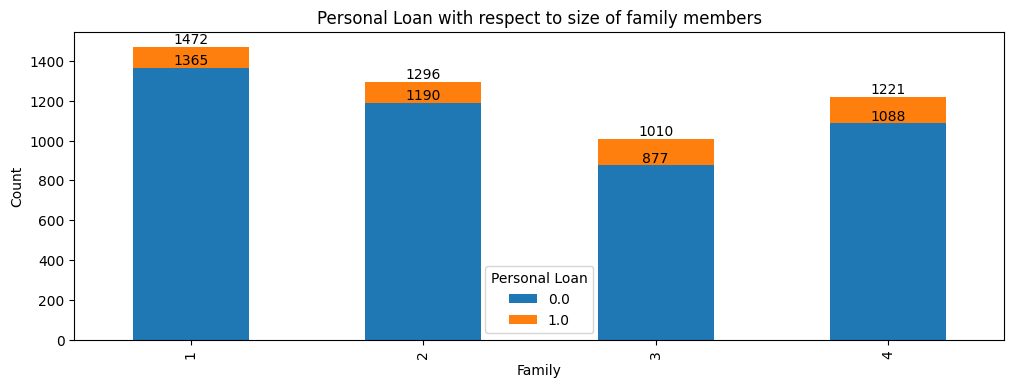

In [51]:
fig, ax=plt.subplots(figsize=(12,4))
grouped_data = df.groupby(['Family', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Family')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to size of family members')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here it can be observed that for those with family size 1 has the maximum customer for not accepting the personal loan and for size 3 has maximum customers for accepting the loan.

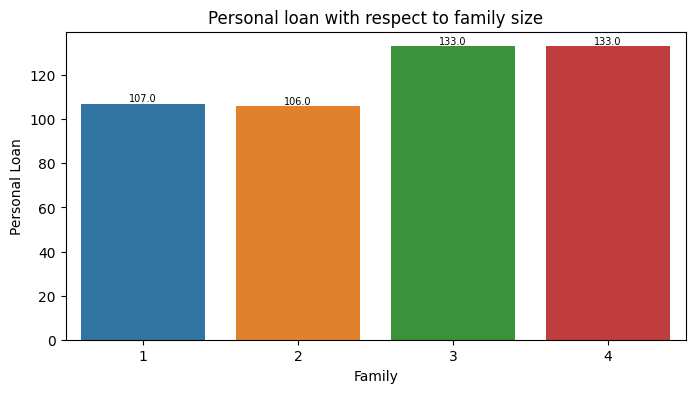

In [52]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('Family')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Family', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)

plt.title('Personal loan with respect to family size')
plt.show()

Here in this bar graph for the customer accepting the personal loan offered, the maximum count accepting the personal loan is from the family size of 3 and 4. Whereas the minimum count for accepting the personal loan is from the family size 2 having the count 106.

## Accepting of Personal loan with respect to the income

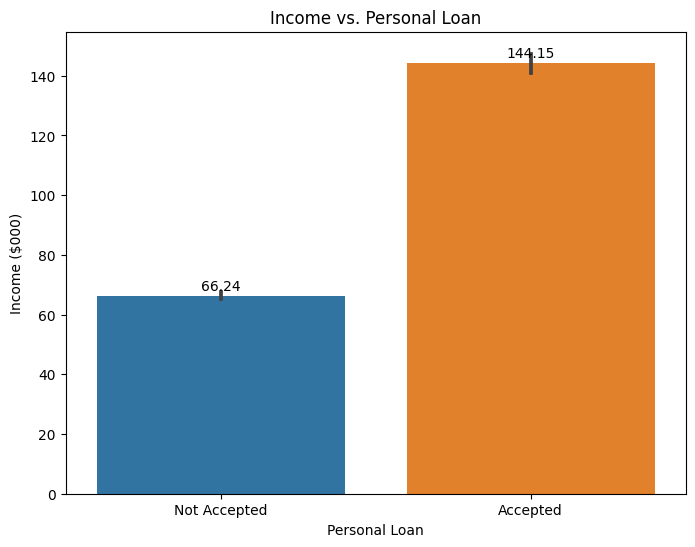

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='Income', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Income ($000)')
plt.title('Income vs. Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for index, value in enumerate(df.groupby('Personal Loan')['Income'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()

We can observe that the the height of each bar represents the average of the income where is is seen that accepted ones is maximum.

## Accepting of the personal loan with respect to the professional experience by the customer.

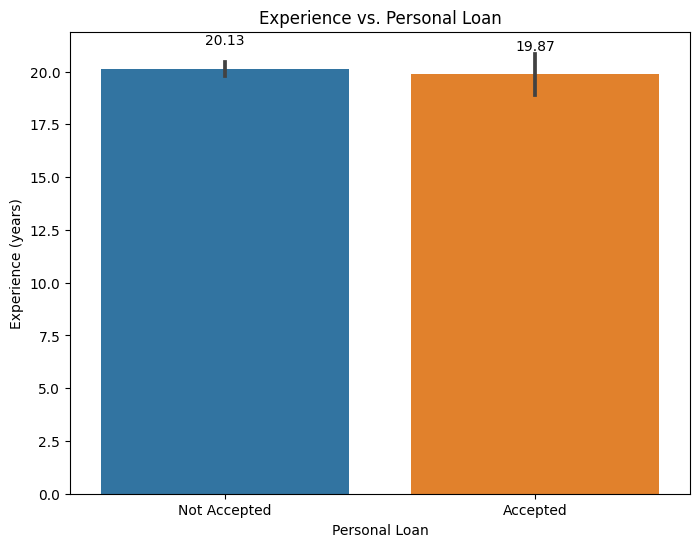

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='Experience', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Experience (years)')
plt.title('Experience vs. Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for index, value in enumerate(df.groupby('Personal Loan')['Experience'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()

Here the maximum customer has not accepted the offer of personal loan.

## Accepting of personal loan with respect to the mortgage.

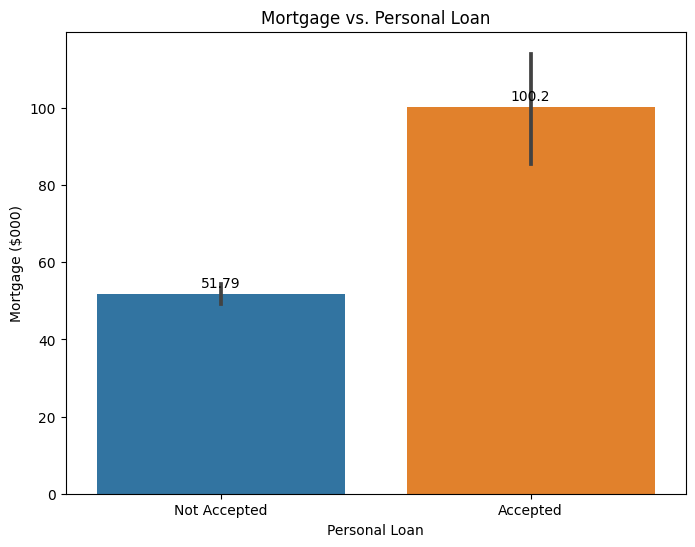

In [55]:

plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='Mortgage', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage vs. Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for index, value in enumerate(df.groupby('Personal Loan')['Mortgage'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()

Here the maximum customer have accepted the personal loan with respect to the mortgage.

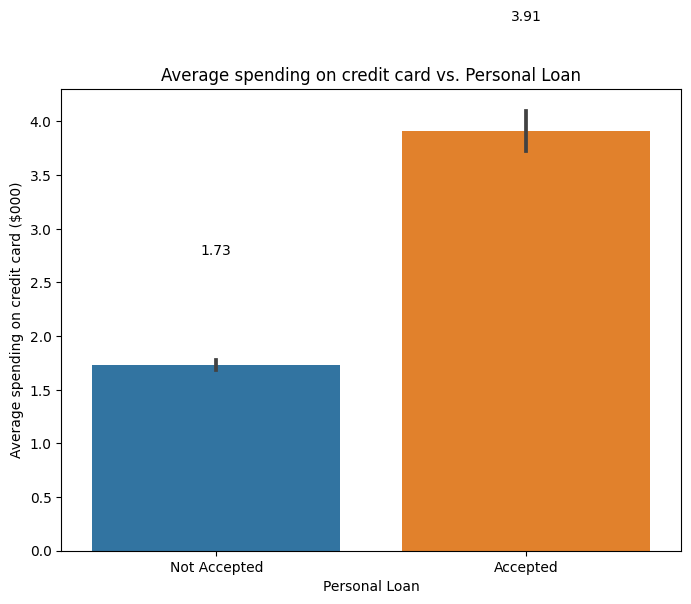

In [56]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='CCAvg', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Average spending on credit card ($000)')
plt.title('Average spending on credit card vs. Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for index, value in enumerate(df.groupby('Personal Loan')['CCAvg'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()

Here the maximum customer accepted the personal loan offered in the last campaign for the average spending on credit card.

## Personal Loan Acceptance by Top 20 ZIP Codes

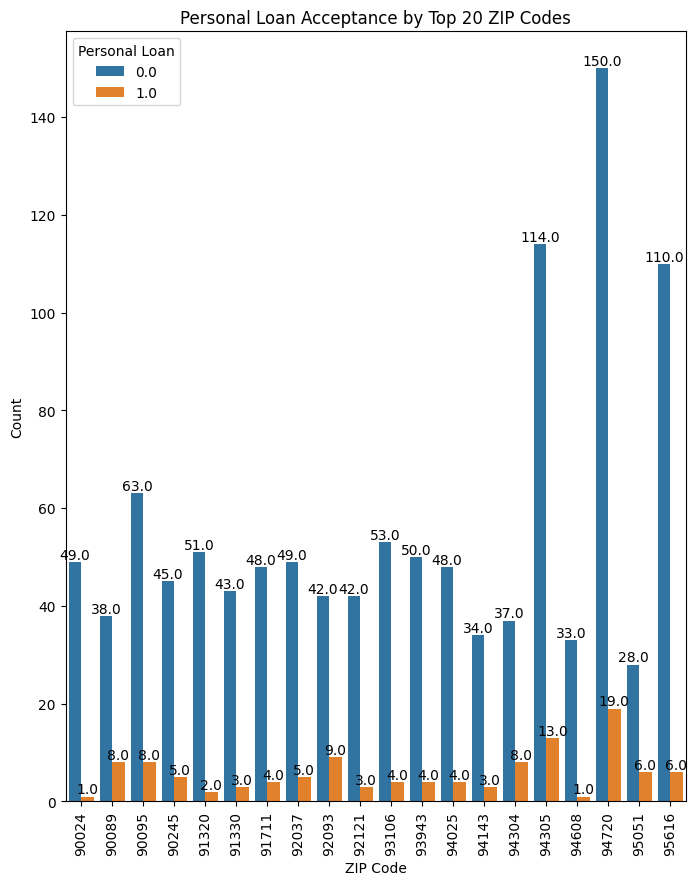

In [57]:
top_zipcode = df['ZIP Code'].value_counts().nlargest(20).index
df_top_zipcode = df[df['ZIP Code'].isin(top_zipcode)]

plt.figure(figsize=(8, 10))
ax=sns.countplot(x='ZIP Code', hue='Personal Loan', data=df_top_zipcode)
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.title('Personal Loan Acceptance by Top 20 ZIP Codes')
plt.legend(title='Personal Loan')
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

The given bar graph represents the top 20 ZIP code having the maximum count for the personal loan.

## Personal Loan Acceptance by Experience

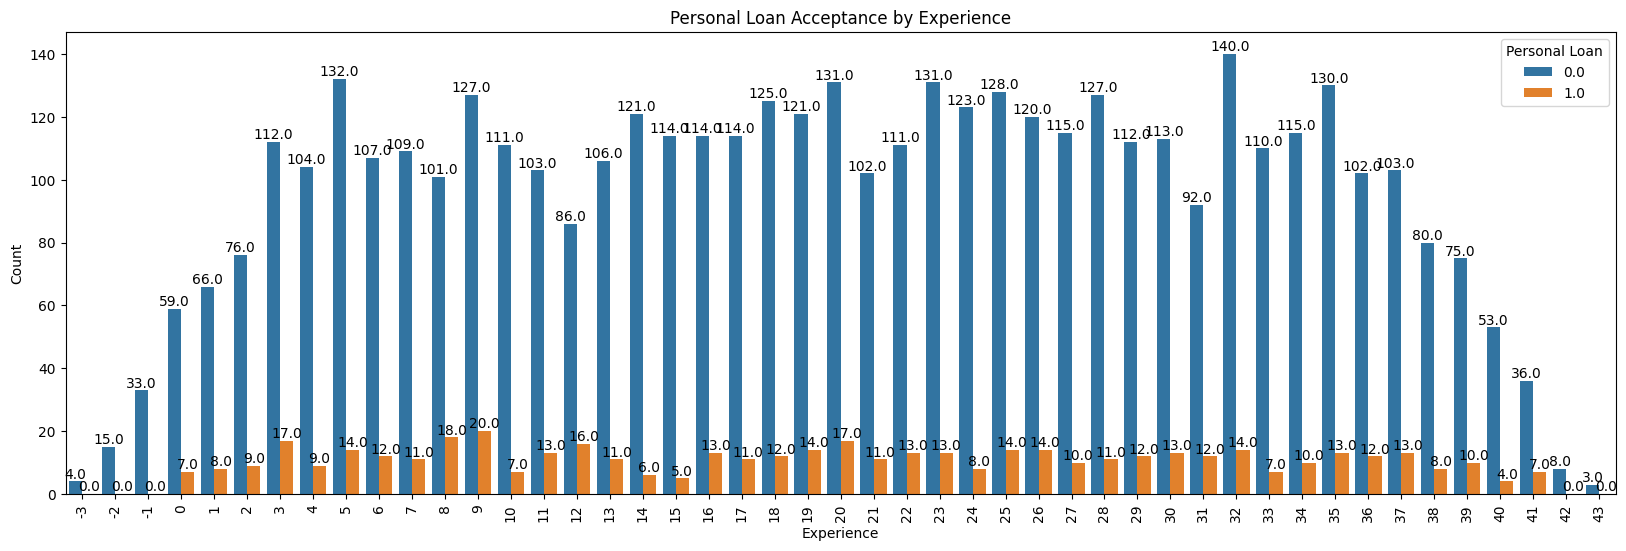

In [58]:
plt.figure(figsize=(20, 6))
ax=sns.countplot(x='Experience', hue='Personal Loan', data=df)
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Personal Loan Acceptance by Experience')
plt.xticks(rotation=90)
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

## Personal Loan Acceptance by Age

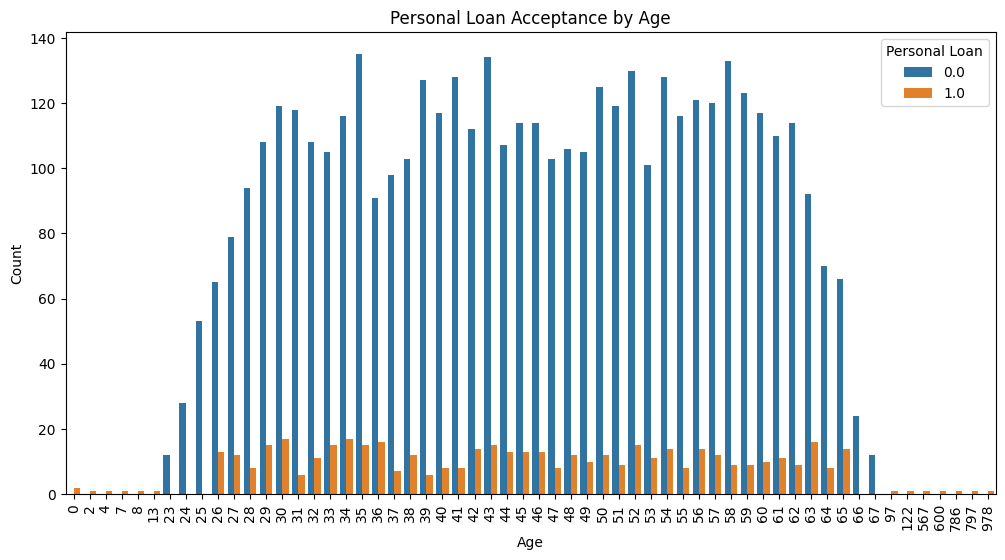

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Personal Loan', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Personal Loan Acceptance by Age')
plt.xticks(rotation=90)
plt.legend(title='Personal Loan')
plt.show()

# Multivariate Analysis

## Income Across Education Levels and Personal Loan Acceptance

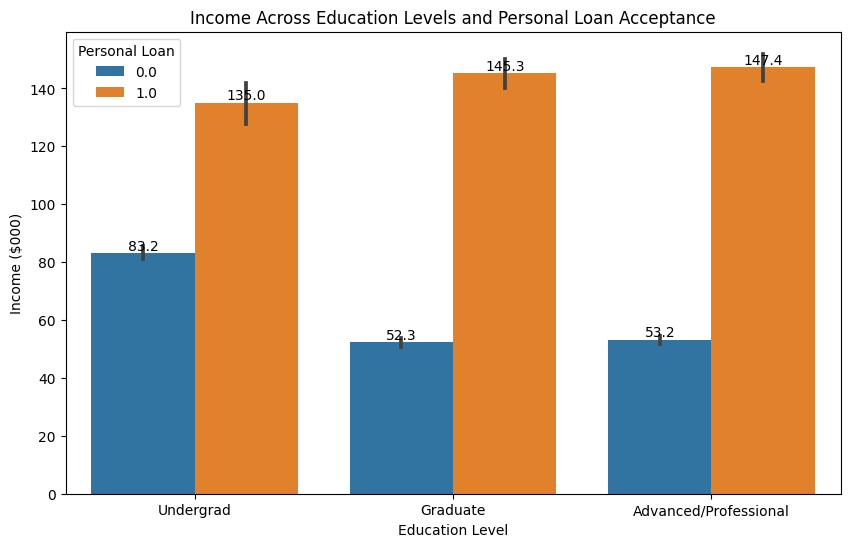

In [60]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Education', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Education Level')
plt.ylabel('Income ($000)')
plt.title('Income Across Education Levels and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.xticks([0,1,2], ['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.show()

With this bar plot the maximum average income of the customer is found to be in the education level of Advanced/Professional having the value of 147.4 who accepted the personal loan offered in the last campaign and the minimum income who accepted the campaign is for the education level of Undergrad having the value of 135.
For those who did not accept the personal loan offered in last campaign the maximum income is found to be at the education level of Undergrad having the value of 83.2 and the minimum is calculated to be at the education level of Advanced/Professional with the value of 53.2

## Average Income Across Size of Family and Personal Loan Acceptance

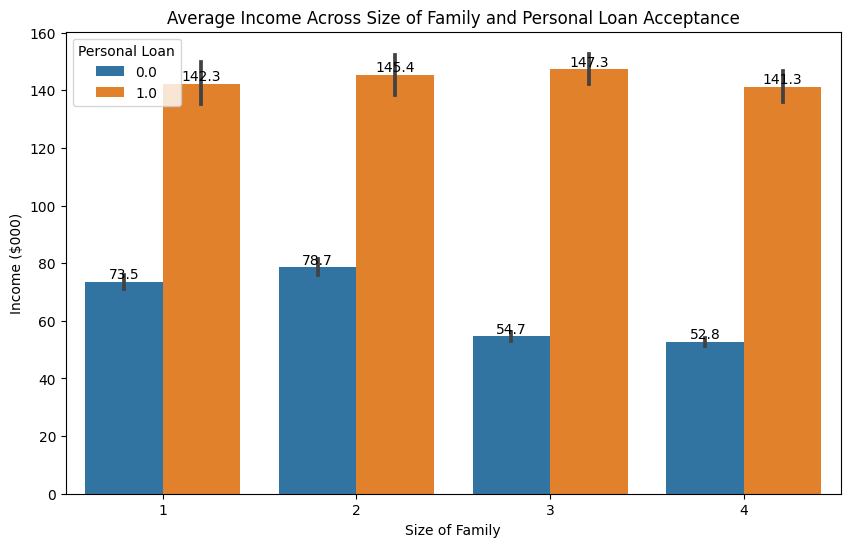

In [61]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Family', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Size of Family')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Size of Family and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Observing the bar graph, for those who accepted the personal loan accepted in the last campaign, family size of 3 has the maximum income and the family size of 4 has the minimum income.
Whereas for those customers who did not accept the personal loan, the family size of 2 has the maximum income and the family size of 4 has the minimum income.

## Average Income Across different genders and Personal Loan Acceptance

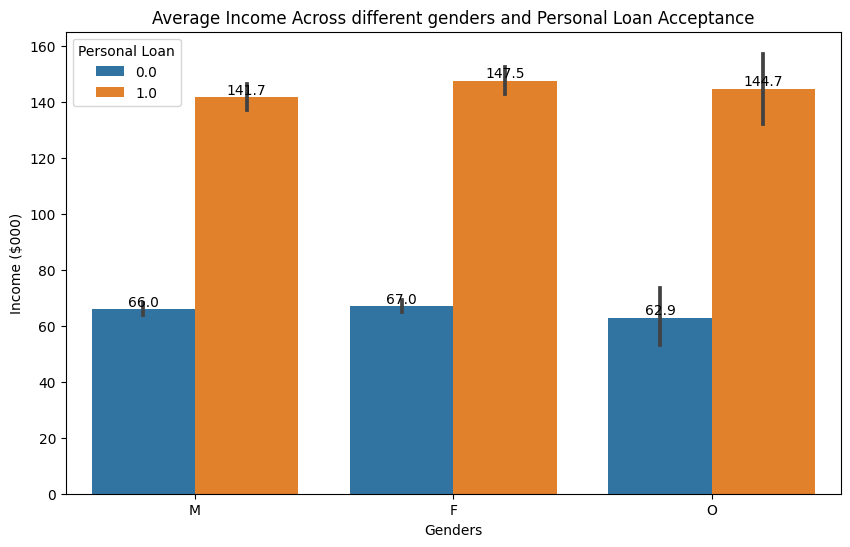

In [62]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Gender', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Genders')
plt.ylabel('Income ($000)')
plt.title('Average Income Across different genders and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Observing the bar graph, the female customer who accepted the personal loan has the maximum income and also the female customer who did not accept the personal loan has the maximum income.
Male customer who accepted the personal loan has minimum income and others has minimum income who did not accept the personal loan.

## Average Income Across type of Home Ownership and Personal Loan Acceptance

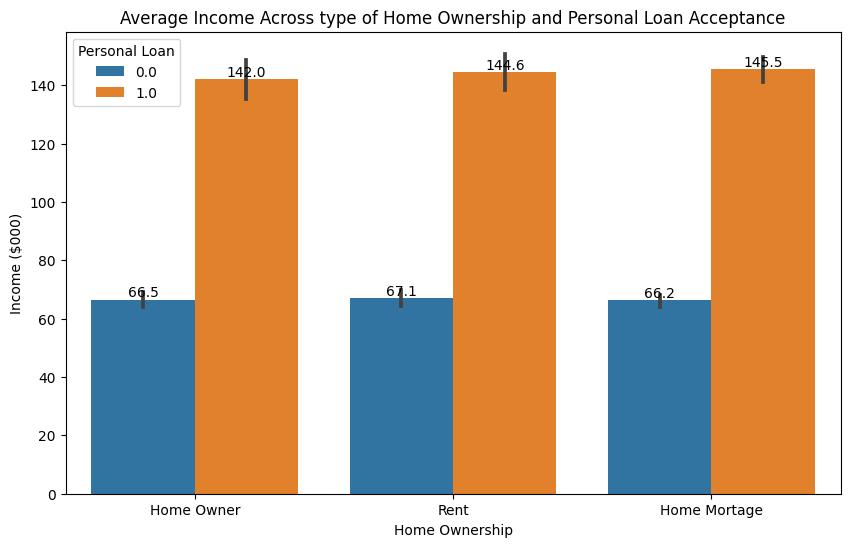

In [63]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Home Ownership', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Income ($000)')
plt.title('Average Income Across type of Home Ownership and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Observing the bar graph, the customers with home mortgage having maximum income has accepted the personal loan while for not accepting the personal loan, the customer with home mortgage has maximum income.

## Average Income Across Education Levels and Personal Loan Acceptance

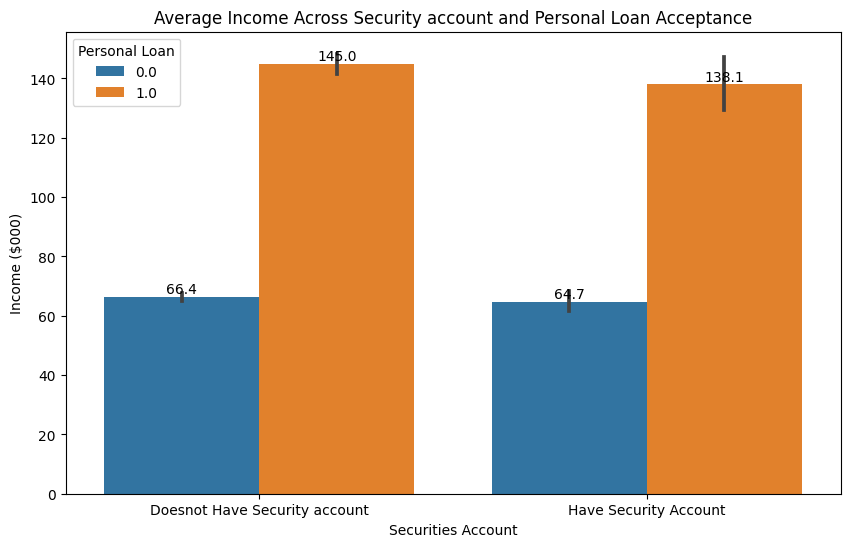

In [64]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Securities Account', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Securities Account')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Security account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Have Security account', 'Have Security Account'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Observing the bar graph, for the customer who accepted the personal loan in the last campaign, maximum number of customer did not have the security account with maximum income.
Whereas, for the customer who did not accept the personal loan, maximum customer also did not have the security account with maximum income comparatively.

## Average Income Across CD Account and Personal Loan Acceptance

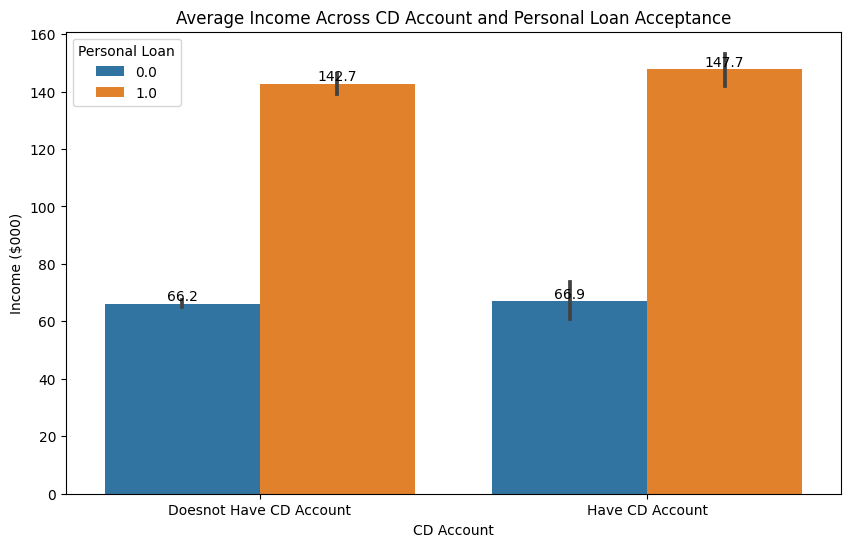

In [65]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='CD Account', y='Income', hue='Personal Loan', data=df)
plt.xlabel('CD Account')
plt.ylabel('Income ($000)')
plt.title('Average Income Across CD Account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Have CD Account', 'Have CD Account'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customers accepting the personal loan, the maximum income of the customer is shown for those customer having the Certificate of Deposit with the bank.
Whereas, considering the customer who did not accept the personal loan, the maximum income of the customer is shown for those who had the Certificate of Deposit.

## Average Income Across Online and Personal Loan Acceptance

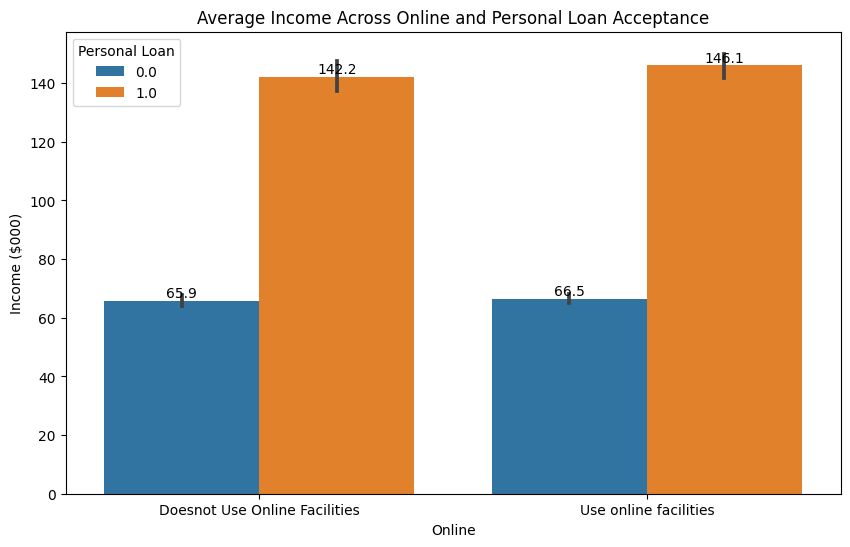

In [66]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Online', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Online')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Online and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Use Online Facilities', 'Use online facilities'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customers who accepted the personal loan, the customer having maximum income use online banking facilities and same is for those customer who did not accept the personal loan offered in last campaign.

## Average Income Across CreditCard and Personal Loan Acceptance

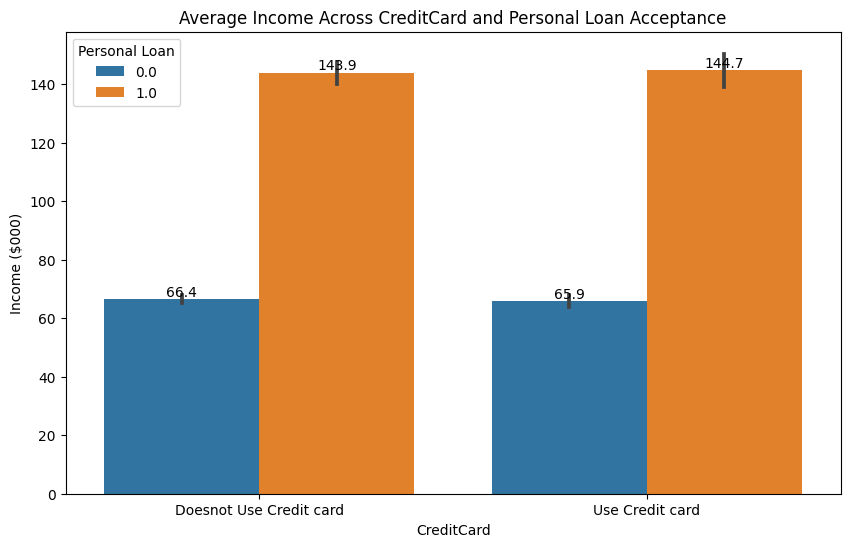

In [67]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='CreditCard', y='Income', hue='Personal Loan', data=df)
plt.xlabel('CreditCard')
plt.ylabel('Income ($000)')
plt.title('Average Income Across CreditCard and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Use Credit card', 'Use Credit card'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customers who accepted the personal loan, the customer having maximum income doesnot use the credit card and same goes with the customer who did not accept the personal loan.

## Mortgage Across Education Levels and Personal Loan Acceptance

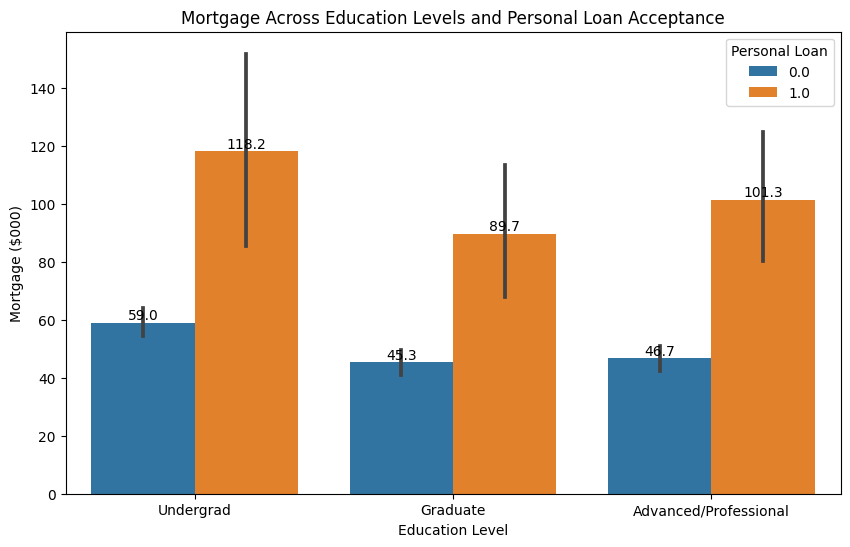

In [68]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Education', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Education Level')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across Education Levels and Personal Loan Acceptance')
plt.xticks([0, 1, 2], ['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Observing the customer accepting the personal loan, the customer having maximum mortgage were in the education level of Undergrad whereas the customer having the minimum mortgage were in the education level of Graduate.
Observing the customer not accepting the personal loan, the customer having maximum mortgage were in the education level of Undergrad whereas the customer having the minimum mortgage were in the education level of Graduate as well.

## Mortgage Across Family size and Personal Loan Acceptance

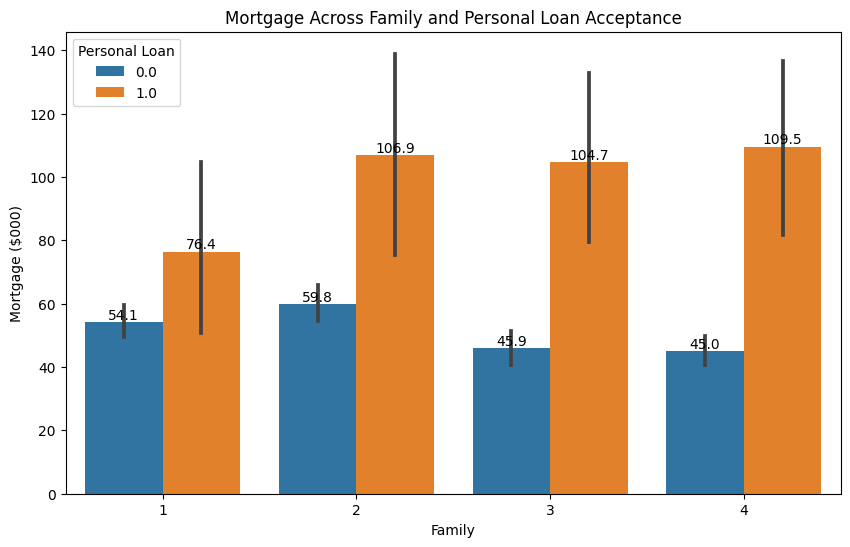

In [69]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Family', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Family')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across Family and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customer accepting the personal loan, customer having the maximum mortgage has the family size of 4 and the customer having the minimum mortgage has the family size of 1.
Whereas considering the customer who did not accept the personal loan, customer having the maximum mortgage has the family size of 2 and the customer having the minimum mortgage has the family size of 4.

## Mortgage Across different gender and Personal Loan Acceptance

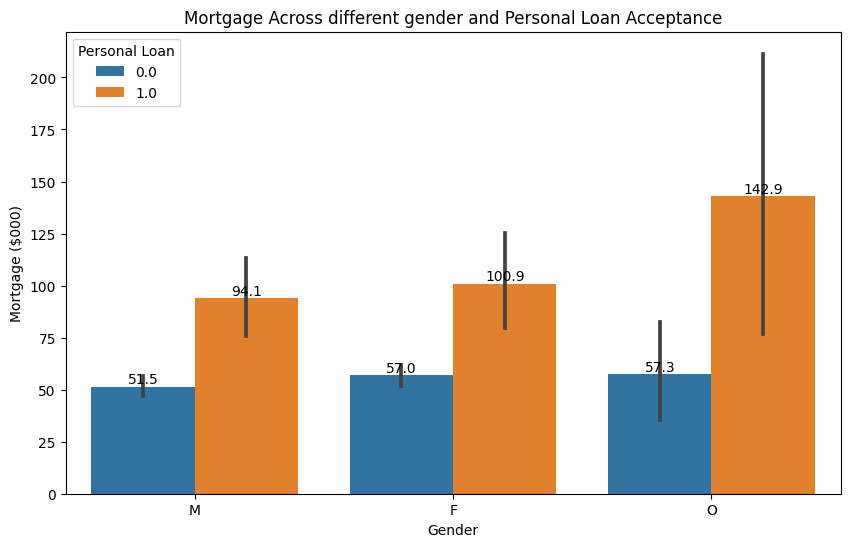

In [70]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Gender', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Gender')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across different gender and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the given graph, the gender other than male and female has the maximum mortgage for accepting the personal loan and male has the minimum mortgage for accepting the personal loan.
For those who did not accept the personal loan, others gender has the maximum mortgage and male has the minimum of all.

## Mortgage Across home ownership and Personal Loan Acceptance

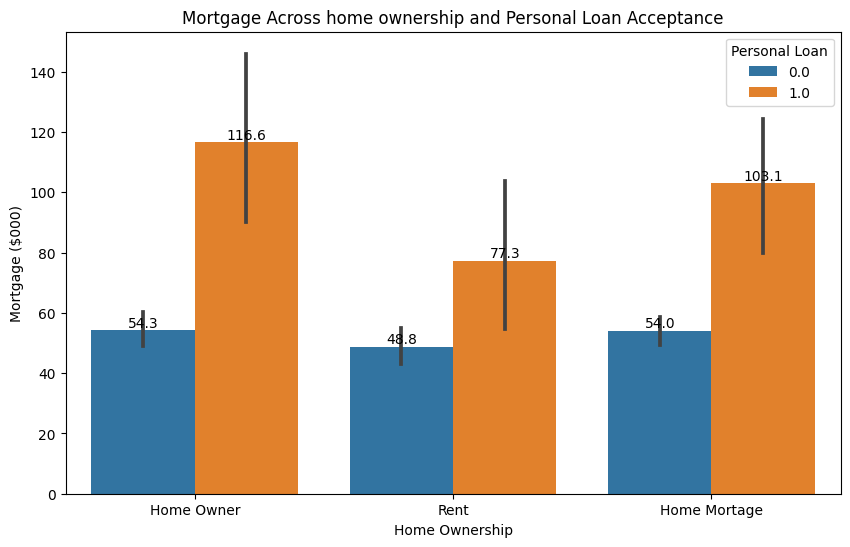

In [71]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Home Ownership', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across home ownership and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the graph, the customer who are home owner having the maximum mortgage accepted the personal loan whereas customer living in rent has the minimum mortgage.
Considering the graph, the customer who are home owner having the maximum mortgage did not accept the personal loan whereas customer living in rent has the minimum mortgage.

## Mortgage Across Security account and Personal Loan Acceptance

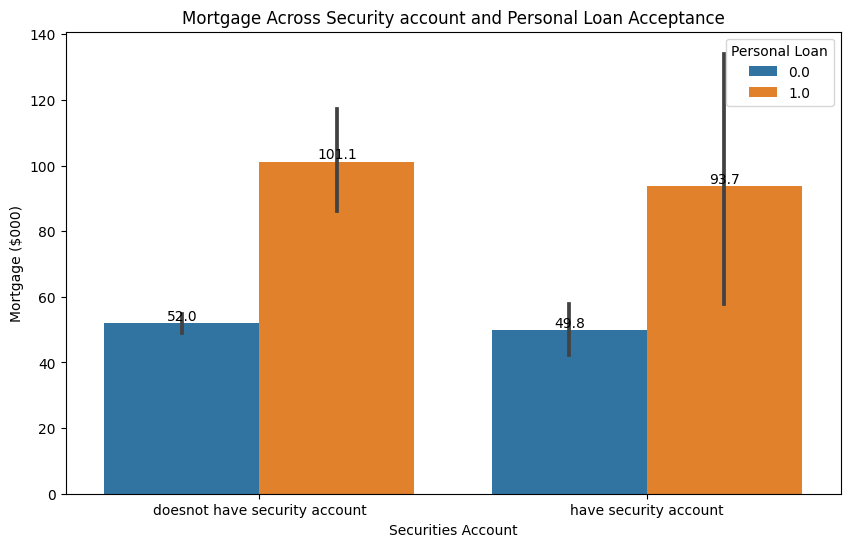

In [72]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Securities Account', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Securities Account')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across Security account and Personal Loan Acceptance')
plt.xticks([0, 1], ['doesnot have security account', 'have security account'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customer accepting the personal loan, the customer having maximum mortgage does not have any security account and same goes for the customer who did not accept the personal loan.

## Mortgage Across CD Account and Personal Loan Acceptance

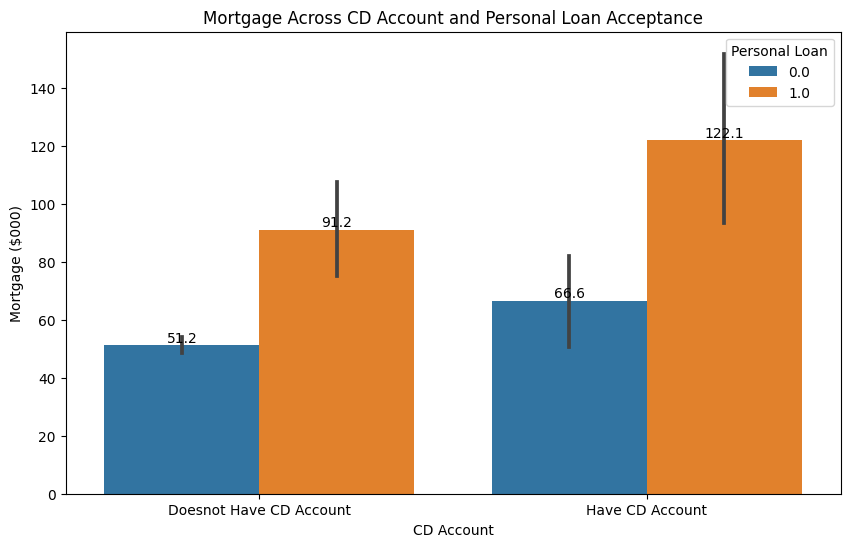

In [73]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='CD Account', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('CD Account')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across CD Account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Have CD Account', 'Have CD Account'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customer accepting as well as not accepting the personal loan, the customer having maximum mortgage both have the certificate of deposit with the bank.

## Mortgage Across using online banking facilities and Personal Loan Acceptance

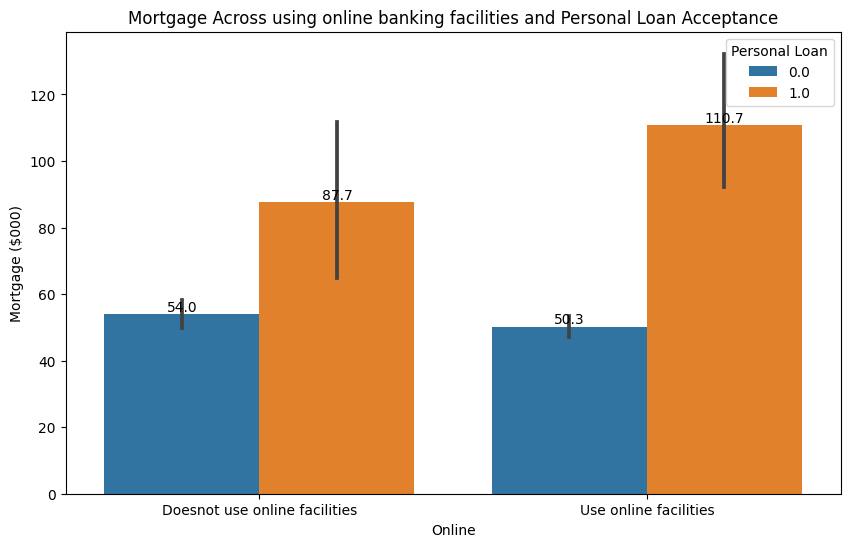

In [74]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Online', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Online')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across using online banking facilities and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot use online facilities', 'Use online facilities'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customer accepting the personal loan, the customer having the maximum mortgage use the online banking facilities whereas considering the customer who did not accept the personal loan, the customer having the maximum mortgage does not use online banking facilities.

## Mortgage Across using Creditcard and Personal Loan Acceptance

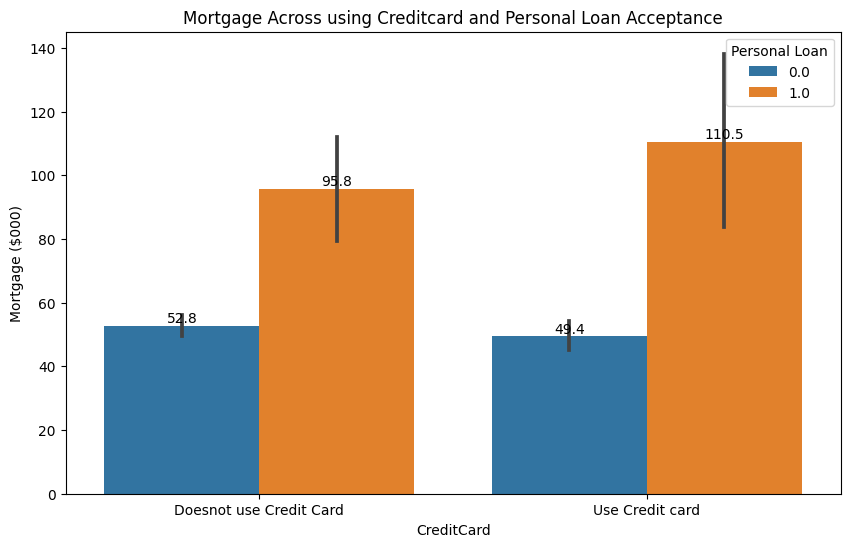

In [75]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='CreditCard', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('CreditCard')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across using Creditcard and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot use Credit Card', 'Use Credit card'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customer accepting the personal loan, the customer having maximum mortgage use the credit card issued by the Universal Bank.

Whereas looking at the customer who did not accept the personal loan, the customer having the maximum mortgage does not use credit card issued by the Universal bank.

## Average spending on credit cards Across Family and Personal Loan Acceptance

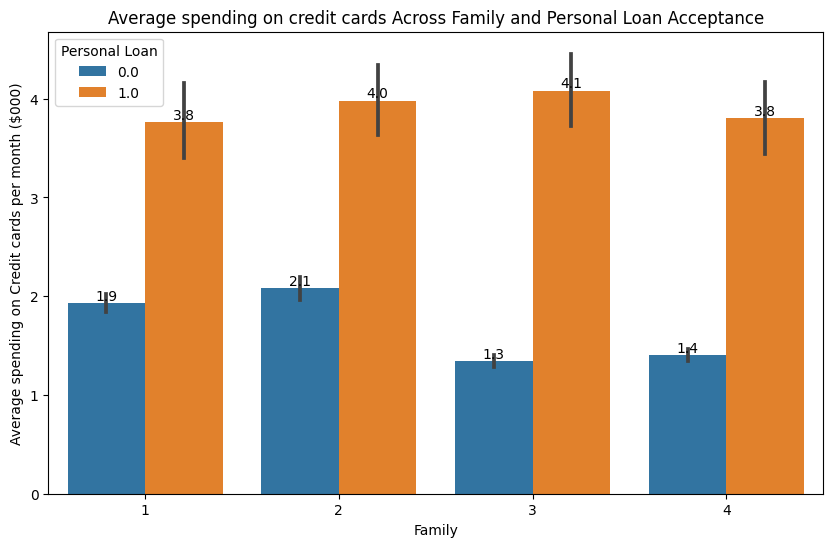

In [76]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Family', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Family')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Family and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customer accepting the personal loan, the customer having maximum average spending on credit card has the family size of 3 while the customer having minimum average spending on cresit card has the family size of 1 and 4.
Whereas, for those who did not accept the personal loan, ones having maximum average spending  on credit card has the family size of 3 while minimum spending has the family size of 3.

## Average spending on credit cards Across gender and Personal Loan Acceptance

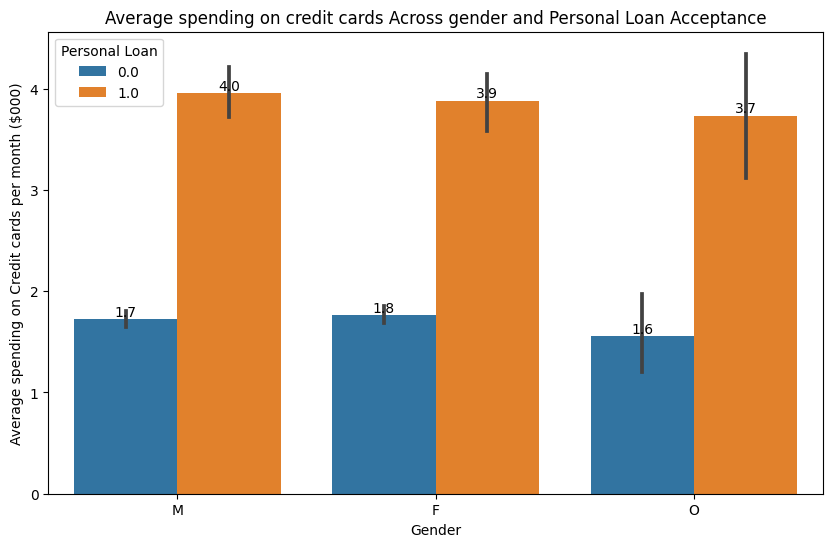

In [77]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Gender', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Gender')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across gender and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Here we can observe that, the male customer accepted the personal loan with maximum average spending on credit card and others has the minimum spendings.
The female customer has the maximum average spending on credit card for those who did not accept the personal loan while others has minimum spendings.

## Average spending on credit cards Across home ownership and Personal Loan Acceptance

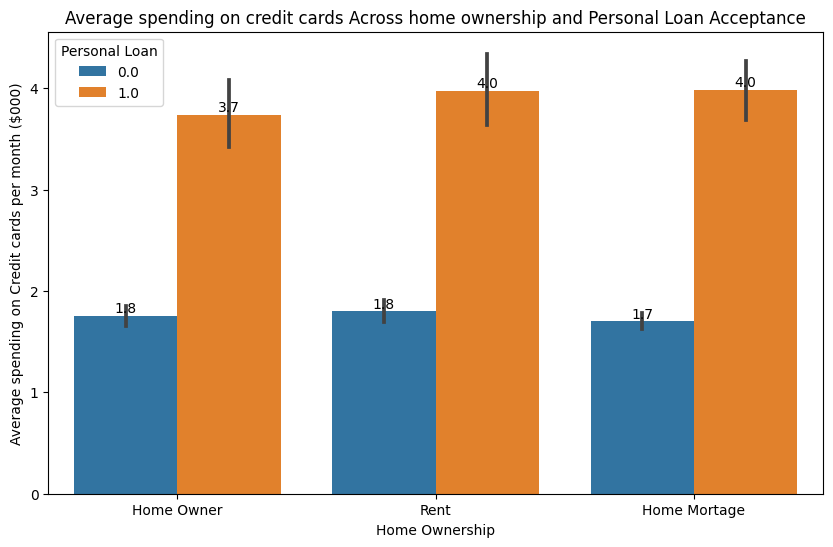

In [78]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Home Ownership', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across home ownership and Personal Loan Acceptance')
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Here we can see that the maximum spending customer having the home mortgage and living in rent has accepted the personal loan while maximum spending customer who owns the house and lives in the rent did accept the personal loan.

## Average spending on credit cards Across Education and Personal Loan Acceptance

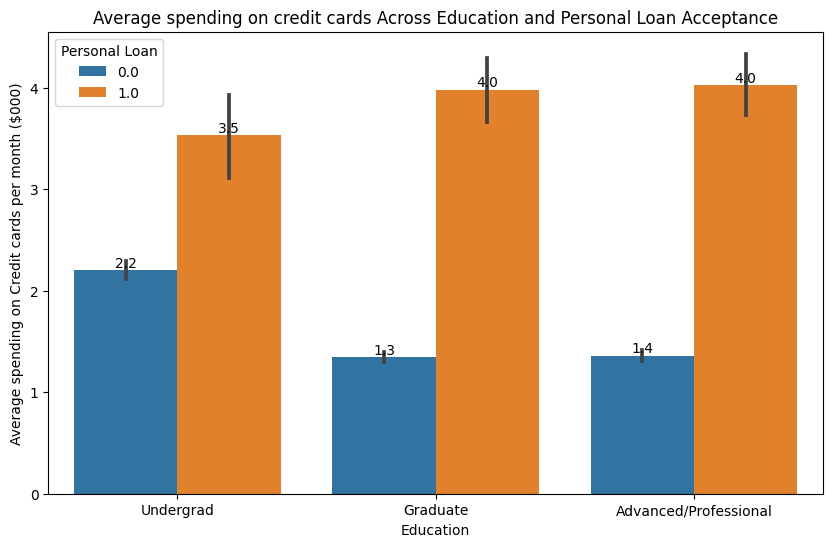

In [79]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Education', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Education')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Education and Personal Loan Acceptance')
plt.xticks([0, 1, 2], ['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

For accepting the personal loan, the customer with maximum average spending on credit card had the educational background as Graduate and Advanced/Professional while the minimum spending had the educational background of Undergrad.
For not accepting the personal loan, the customer having maximum spending had the educational level of Undergraduate while with minimum spending the educational spedings was of Graduate education level.

## Average spending on credit cards Across Security account and Personal Loan Acceptance

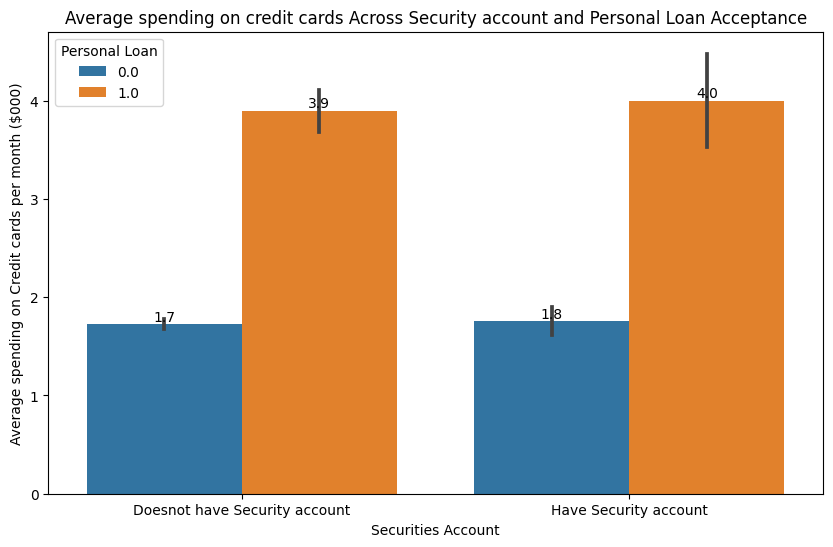

In [80]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Securities Account', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Securities Account')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Security account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot have Security account', 'Have Security account'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering those who accepted the personal loan, the customer having maximum spending on the credit cards have the security accounts while for those who did not accept the personal loan the customer having maximum spending doesnot have security account.

## Average spending on credit cards Across CD account and Personal Loan Acceptance

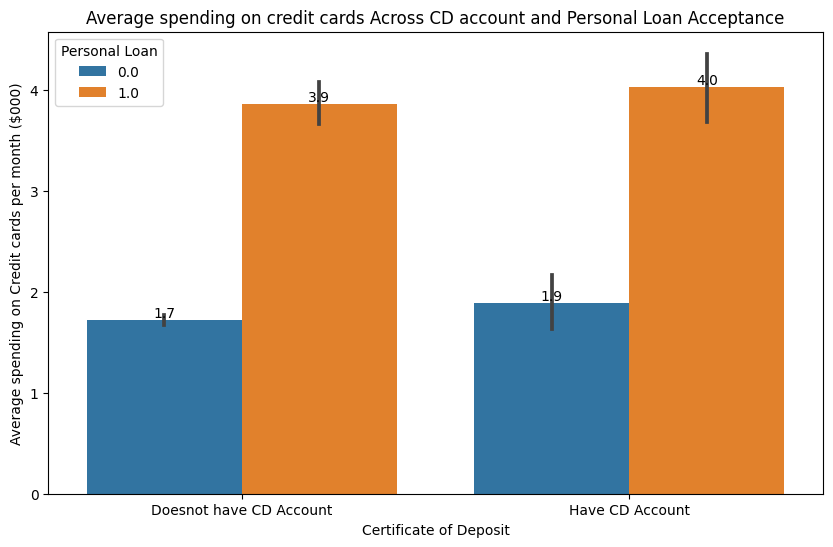

In [81]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='CD Account', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Certificate of Deposit')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across CD account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot have CD Account', 'Have CD Account'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Here for the maximum spending on credit cards, both the customer who have accepted the personal loan and who has not accepted the personal loan has the Certificate of Deposit with the bank.

## Average spending on credit cards Across online usage and Personal Loan Acceptance

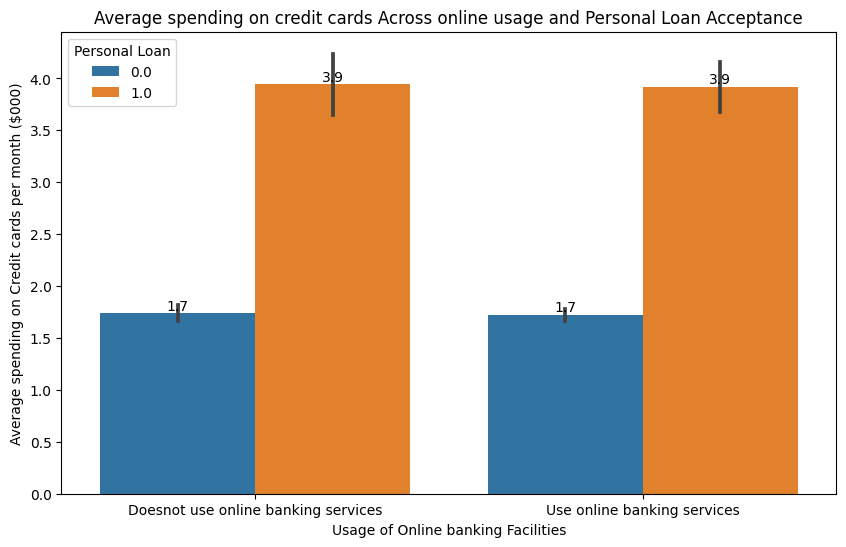

In [82]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Online', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Usage of Online banking Facilities')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across online usage and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot use online banking services', 'Use online banking services'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

In the given bar graph, we can observe that for both the cases i.e. customer accepting the personal loan as well as customer not accepting the personal loan both have the equal average spending on the usage of the online banking services.

## Average spending on credit cards Across Creditcard and Personal Loan Acceptance

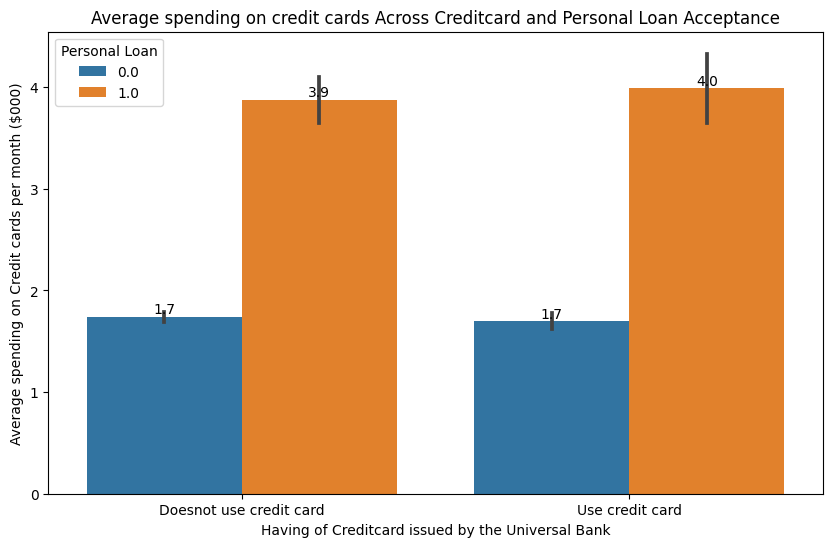

In [83]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='CreditCard', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Having of Creditcard issued by the Universal Bank')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Creditcard and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot use credit card', 'Use credit card'])
plt.legend(title='Personal Loan')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

Considering the customer accepting the personal loan, the customer having maximum average spending in credit card is 4.0.

## Distribution of CCAvg with respect to Personal Loan Acceptance

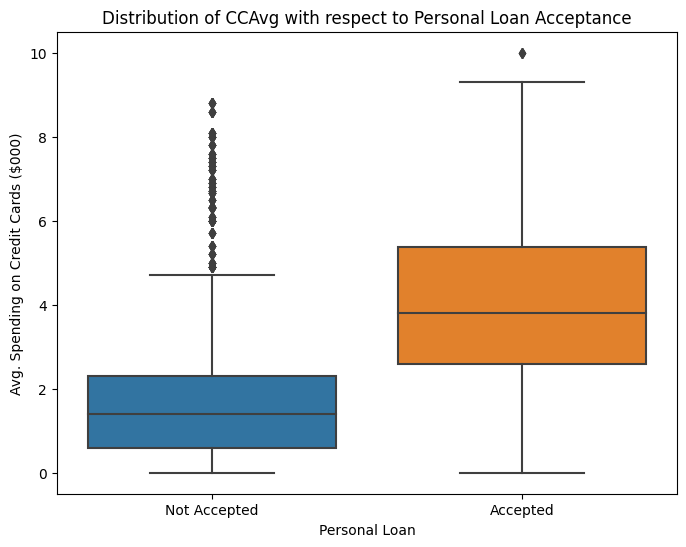

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='CCAvg', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Avg. Spending on Credit Cards ($000)')
plt.title('Distribution of CCAvg with respect to Personal Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

Looking at the box plot, we can get that for the average spending on credit cards per month the customer not accepting the personal loan displays more outlier than that of customers accepting the personal loan.

## Distribution of Mortgage with respect to Personal Loan Acceptance

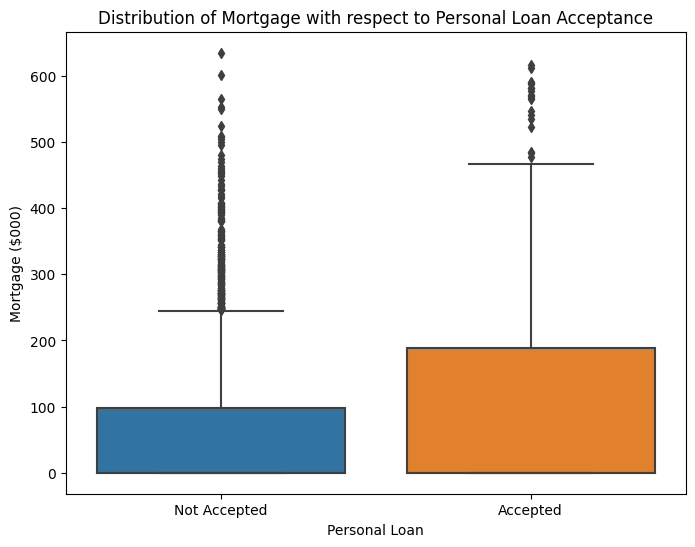

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='Mortgage', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage ($000)')
plt.title('Distribution of Mortgage with respect to Personal Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

Observing the box plot, considering the mortgage, the list in which the customer did not accept the personal loan presents more outlier than that of the ones who accepted the personal loan.

## Distribution of Experience with respect to Personal Loan Acceptance

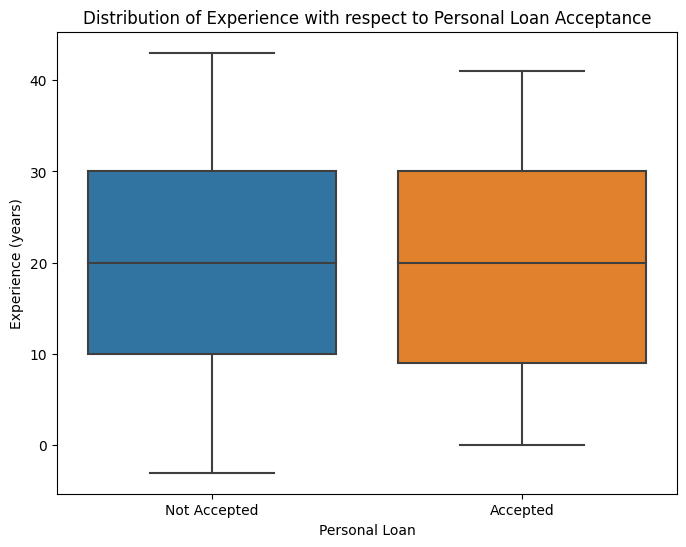

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='Experience', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Experience (years)')
plt.title('Distribution of Experience with respect to Personal Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

As observed in the box plot, we can see that there is no outlier present in the experience with repect to the personal loan.

## Distribution of income with respect to Personal Loan Acceptance

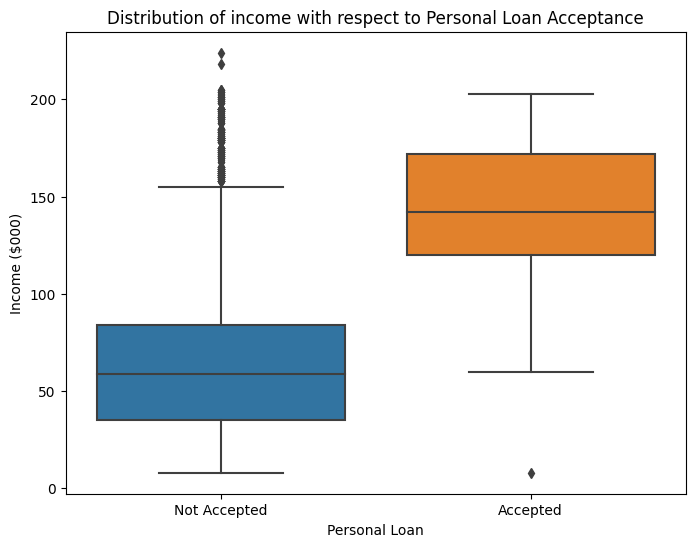

In [87]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='Income', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Income ($000)')
plt.title('Distribution of income with respect to Personal Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

Observing the box plot, the income column with respect to the personal loan acceptance, the presence of outlier seems more if the customer did not accept the personal loan than that of the customer accepting the personal loan.

## Personal Loan Acceptance based on Age and Income

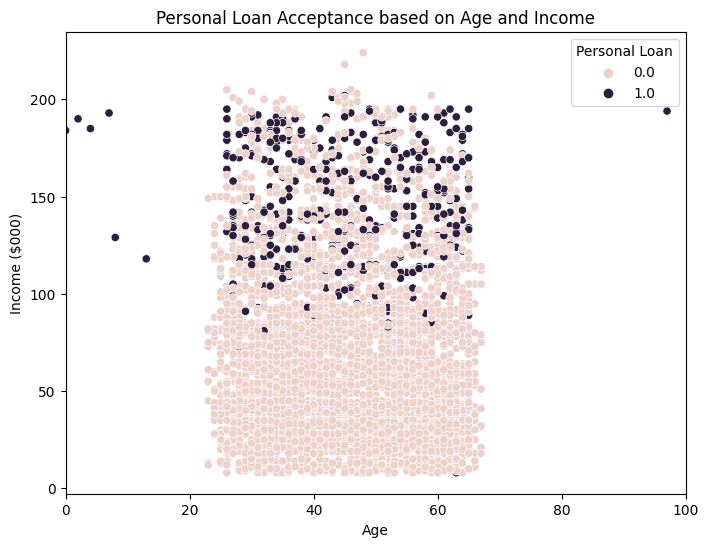

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Age')
plt.ylabel('Income ($000)')
plt.title('Personal Loan Acceptance based on Age and Income')
plt.legend(title='Personal Loan')
plt.xlim(0, 100)
plt.show()

In this scatter plot we can observe that the maximum number of customer not accepting the personal loan offered in the  last campaign has the income below 100 ($000) at the age ranging from 20-65.

Similarly, the maximum number of customer accepting the personal loan has the income above 100 ($000) at the age of 25-65.

## Personal Loan Acceptance based on Age and Mortgage

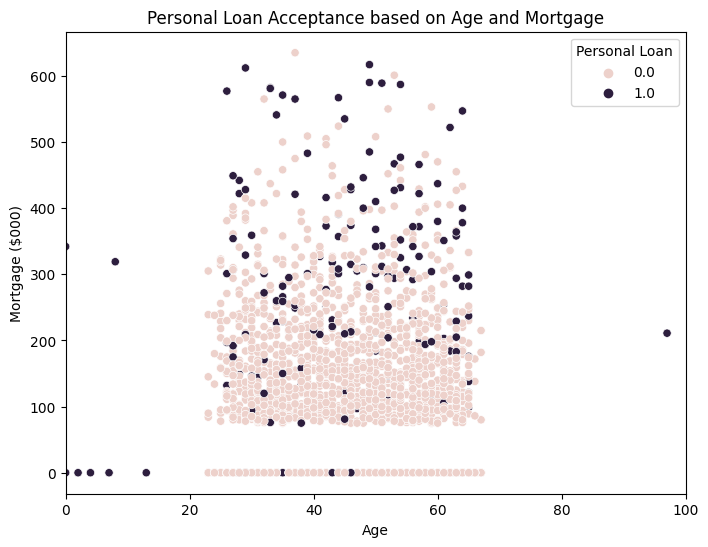

In [89]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Age', y='Mortgage', data=df, hue='Personal Loan')
plt.xlabel('Age')
plt.ylabel('Mortgage ($000)')
plt.title('Personal Loan Acceptance based on Age and Mortgage')
plt.legend(title='Personal Loan')
plt.xlim(0, 100)
plt.show()

In this scatter plot we can observe that the maximum number of customer not accepting the personal loan offered in the last campaign has the income below 200 ($000) at the age ranging from 20-65.

Similarly, the maximum number of customer accepting the personal loan has the income above 100 ($000) at the age of 25-65.

## Personal Loan Acceptance based on Age and CCAvg

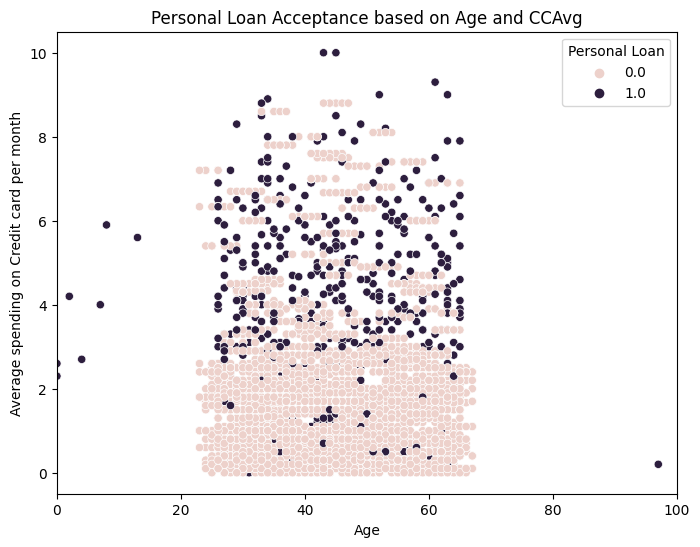

In [90]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Age', y='CCAvg', data=df, hue='Personal Loan')
plt.xlabel('Age')
plt.ylabel('Average spending on Credit card per month')
plt.title('Personal Loan Acceptance based on Age and CCAvg')
plt.legend(title='Personal Loan')
plt.xlim(0, 100)
plt.show()

In this scatter plot we can observe that the maximum number of customer not accepting the personal loan offered in the last campaign has the income below 4 at the age ranging from 20-65.

Similarly, the maximum number of customer accepting the personal loan has the income above 2.5 at the age of 25-65.